# Importing required packages and classes|

In [1]:
from imports import *

# Creating datasets and dataloaders

In [2]:
directory = 'train'
means=[0.485, 0.456, 0.406]
stds=[0.229, 0.224, 0.225]
train_loader, val_loader, test_loader, combined_loader ,train_set , val_set , test_set, dataset = load_split_data(directory, means, stds)

# Taking a small sample for testing

In [3]:
# # Get the number of samples in each dataset
# train_size = len(train_set)
# val_size = len(val_set)
# test_size = len(test_set)
# combined_size=train_size+val_size

# # Randomly select 5% of indices for each dataset
# train_subset_indices = random.sample(range(train_size), int(0.005 * train_size))
# val_subset_indices = random.sample(range(val_size), int(0.005 * val_size))
# test_subset_indices = random.sample(range(test_size), int(0.005 * test_size))
# combined_indices = random.sample(range(combined_size), int(0.005 * combined_size))

# # Create DataLoader instances with the randomly selected subset
# train_loader = DataLoader(train_set, batch_size=64, sampler=train_subset_indices)
# val_loader = DataLoader(val_set, batch_size=64, sampler=val_subset_indices)
# test_loader = DataLoader(test_set, batch_size=64, sampler=test_subset_indices)
# combined_loader = DataLoader(ConcatDataset([train_set, val_set]), batch_size=64, sampler=combined_indices)

# Custom CNN

In [4]:
best_models = pd.DataFrame(columns=['model_name', 'model','val_loss'])

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.66E-03


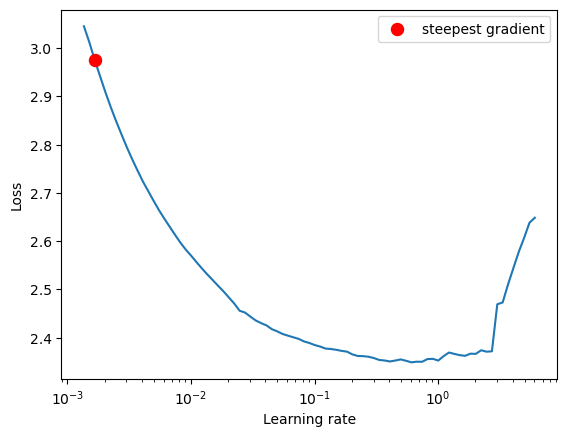

Selected learning rate from LR range test: 0.0005


Validation Accuracy: 64.35%
Validation Loss: 1.26


Validation Accuracy: 93.04%
Validation Loss: 0.37


Validation Accuracy: 96.82%
Validation Loss: 0.16


Validation Accuracy: 97.71%
Validation Loss: 0.11


Validation Accuracy: 98.13%
Validation Loss: 0.07


Validation Accuracy: 98.66%
Validation Loss: 0.06


Validation Accuracy: 98.90%
Validation Loss: 0.05


Validation Accuracy: 98.84%
Validation Loss: 0.05
Early stopping triggered. Restoring best model weights.



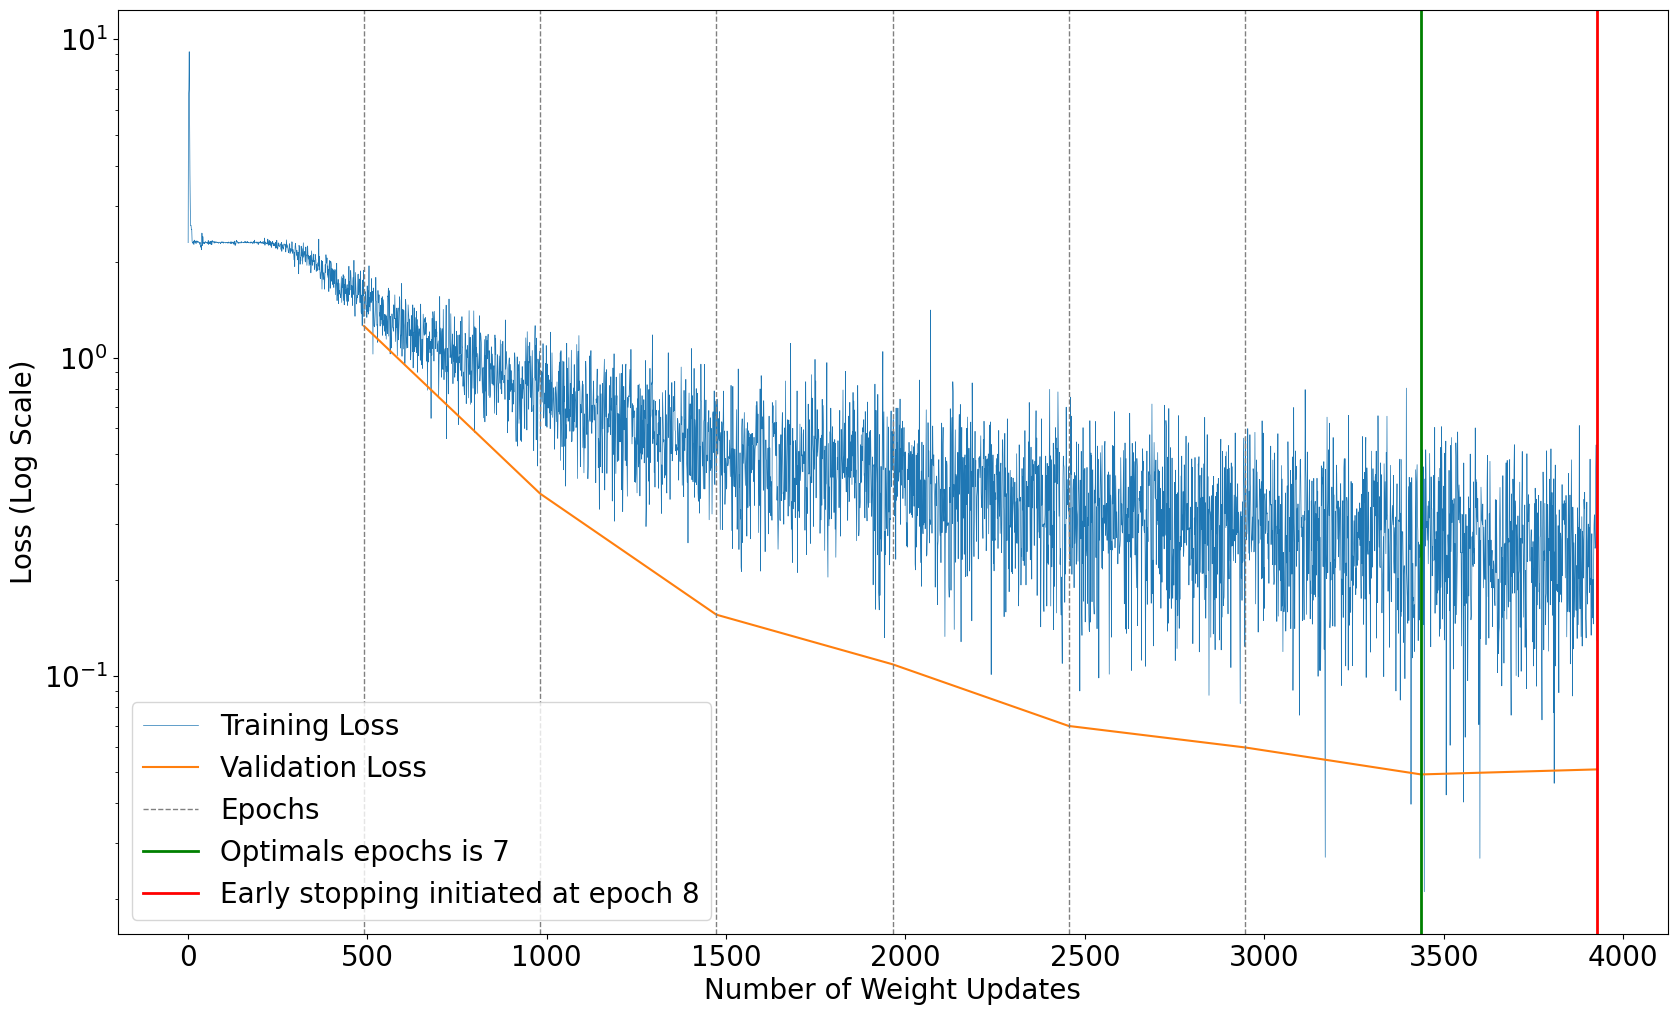

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.11E+00


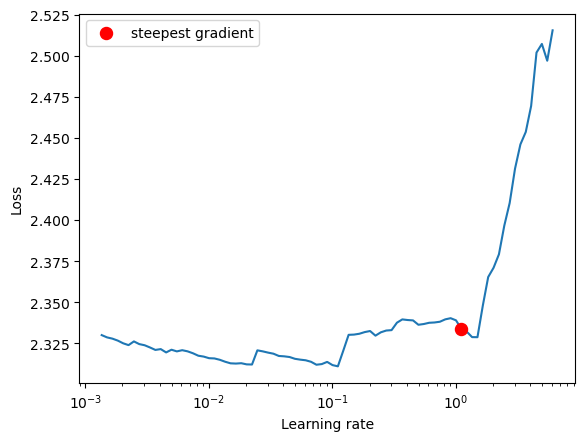

Selected learning rate from LR range test: 0.0005


Validation Accuracy: 89.89%
Validation Loss: 0.35


Validation Accuracy: 96.52%
Validation Loss: 0.12


Validation Accuracy: 97.68%
Validation Loss: 0.07


Validation Accuracy: 97.98%
Validation Loss: 0.07


Validation Accuracy: 98.66%
Validation Loss: 0.05


Validation Accuracy: 98.84%
Validation Loss: 0.03


Validation Accuracy: 99.14%
Validation Loss: 0.03


Validation Accuracy: 99.23%
Validation Loss: 0.03


Validation Accuracy: 99.26%
Validation Loss: 0.03


Validation Accuracy: 99.08%
Validation Loss: 0.03
Early stopping triggered. Restoring best model weights.



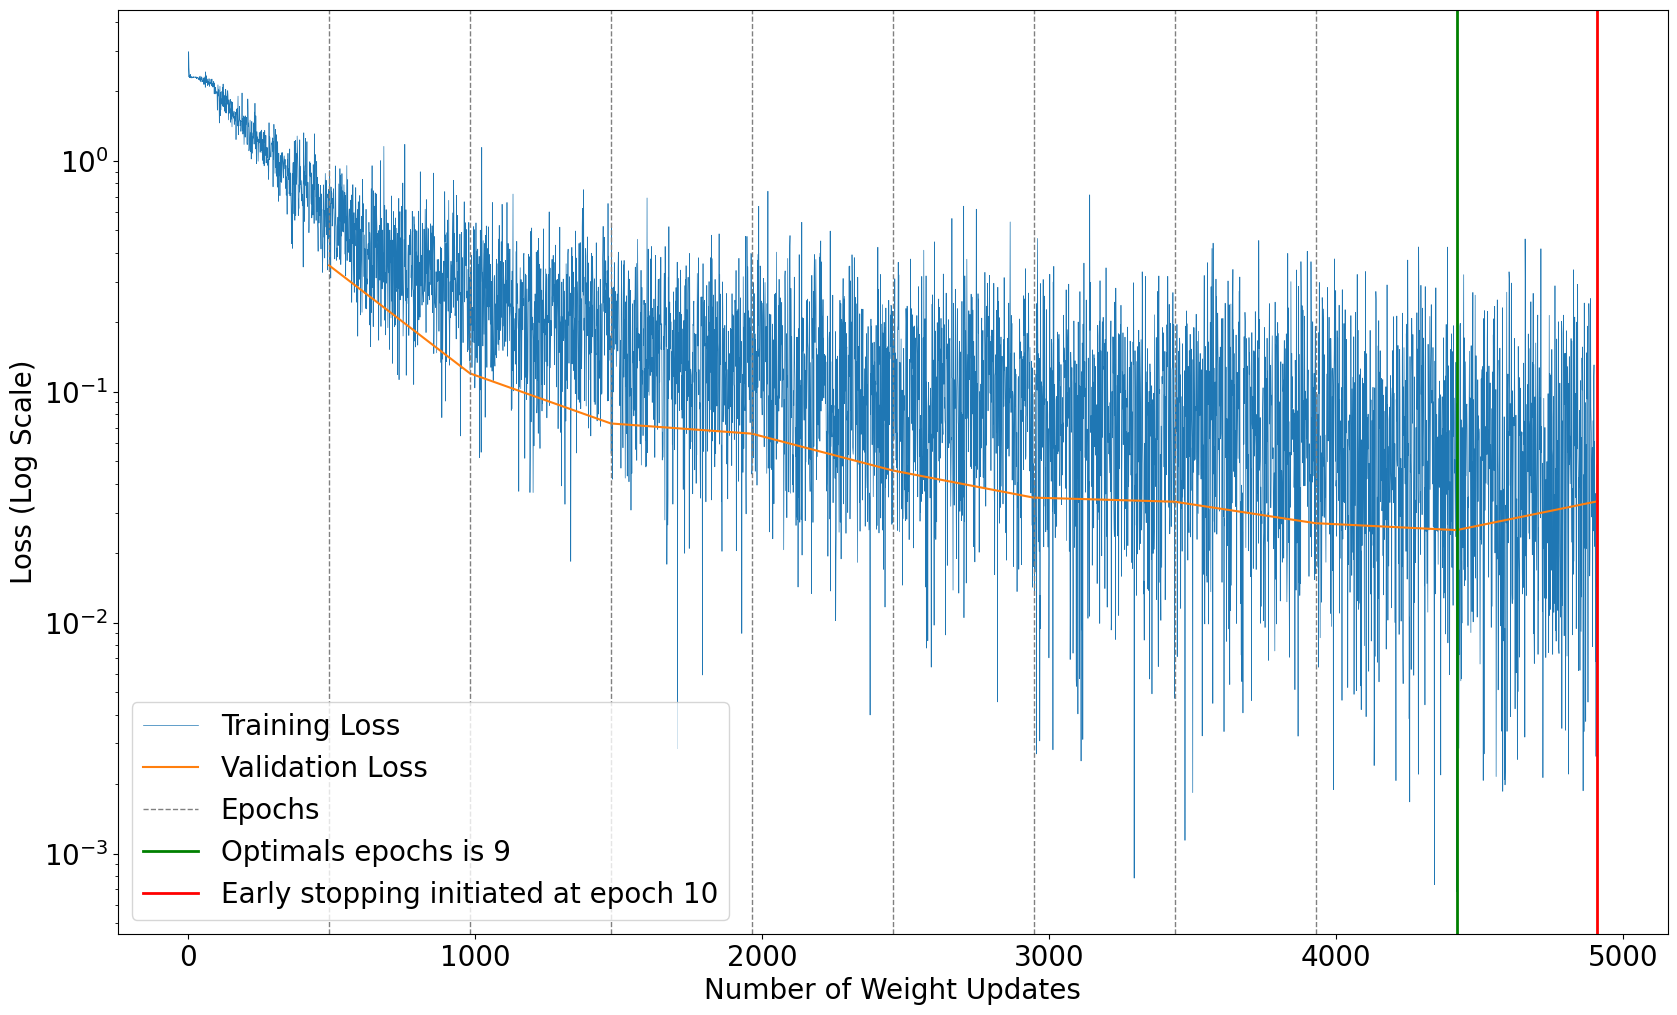

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.11E+00


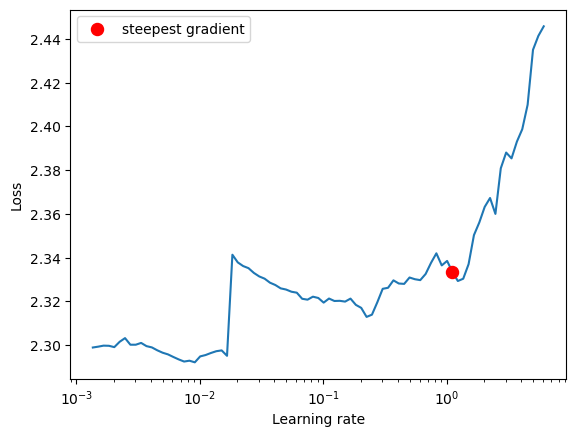

Selected learning rate from LR range test: 0.0005526049257526167


Validation Accuracy: 80.97%
Validation Loss: 0.67


Validation Accuracy: 92.86%
Validation Loss: 0.24


Validation Accuracy: 96.31%
Validation Loss: 0.14


Validation Accuracy: 97.32%
Validation Loss: 0.10


Validation Accuracy: 98.10%
Validation Loss: 0.07


Validation Accuracy: 98.33%
Validation Loss: 0.06


Validation Accuracy: 98.60%
Validation Loss: 0.05


Validation Accuracy: 98.84%
Validation Loss: 0.05


Validation Accuracy: 98.90%
Validation Loss: 0.04


Validation Accuracy: 98.96%
Validation Loss: 0.04
Early stopping triggered. Restoring best model weights.



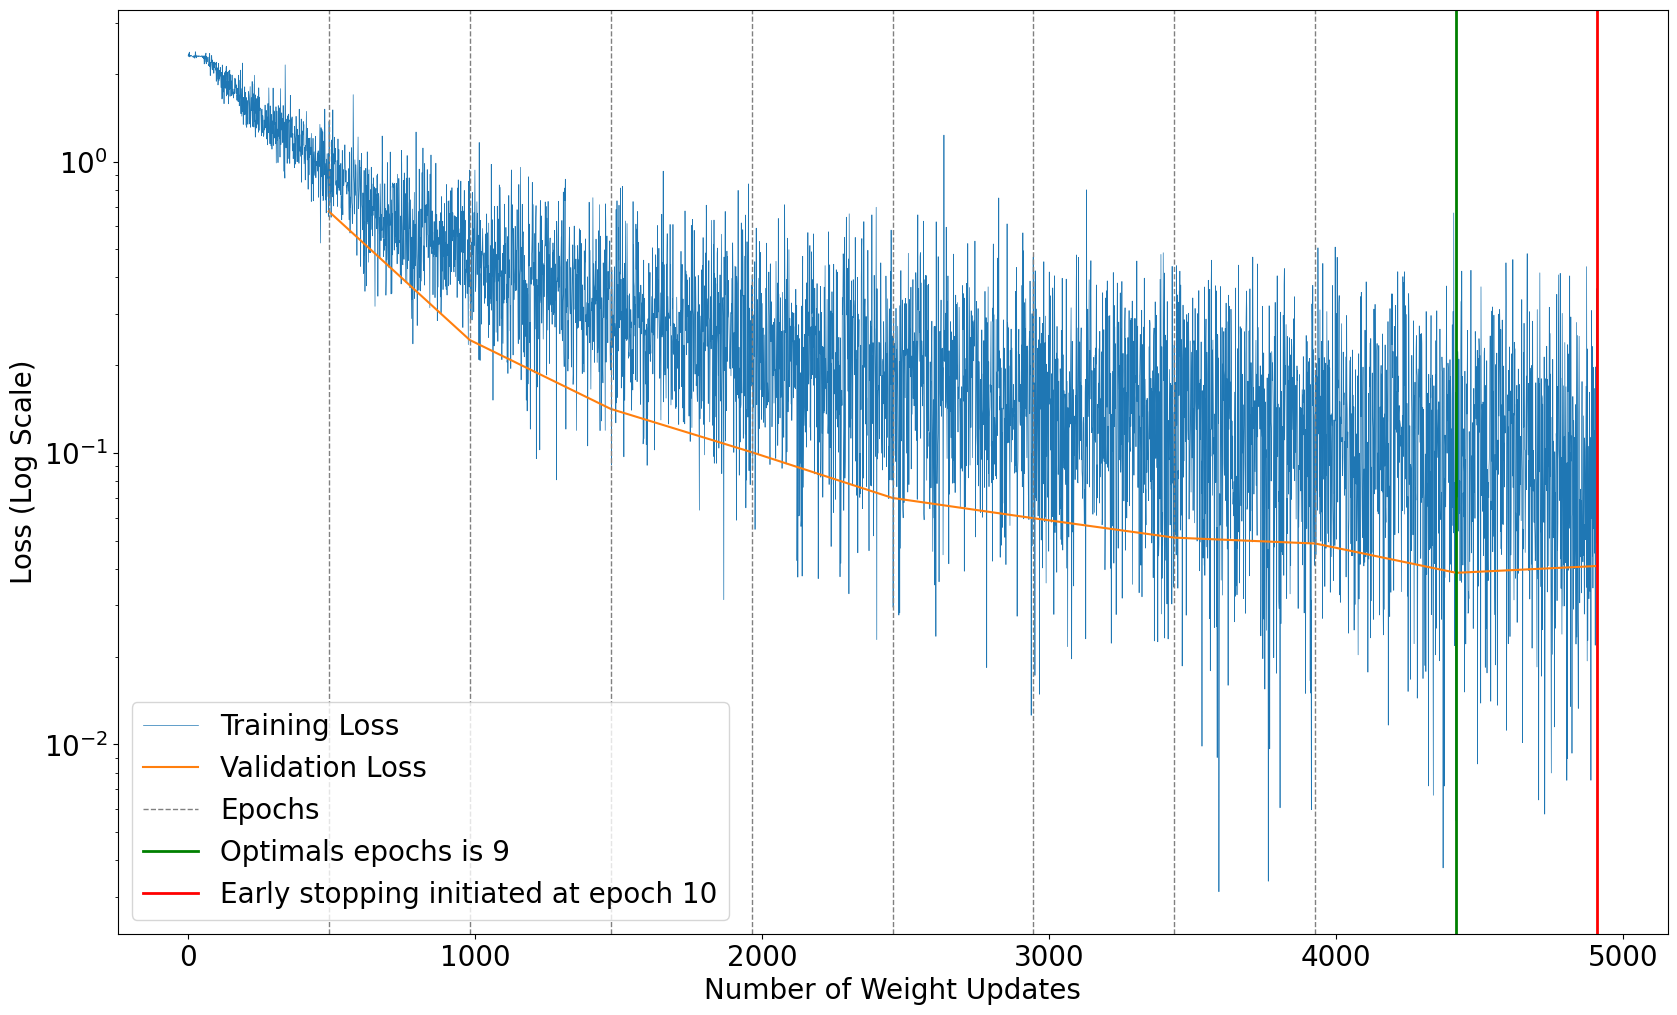

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.52E-02


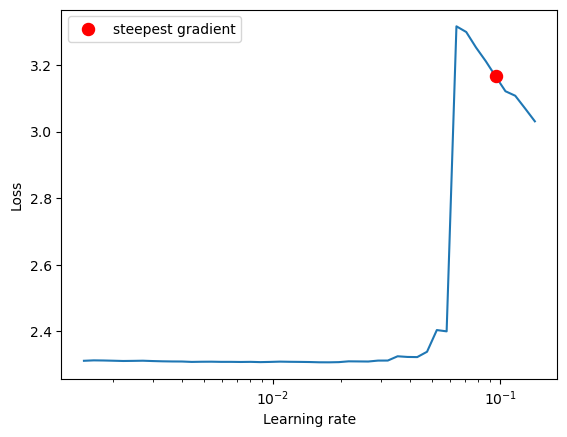

Selected learning rate from LR range test: 0.01768567572275735


Validation Accuracy: 9.99%
Validation Loss: 2.30


Validation Accuracy: 11.03%
Validation Loss: 2.30


Validation Accuracy: 10.32%
Validation Loss: 2.30


Validation Accuracy: 10.20%
Validation Loss: 2.30


Validation Accuracy: 11.03%
Validation Loss: 2.30
Early stopping triggered. Restoring best model weights.



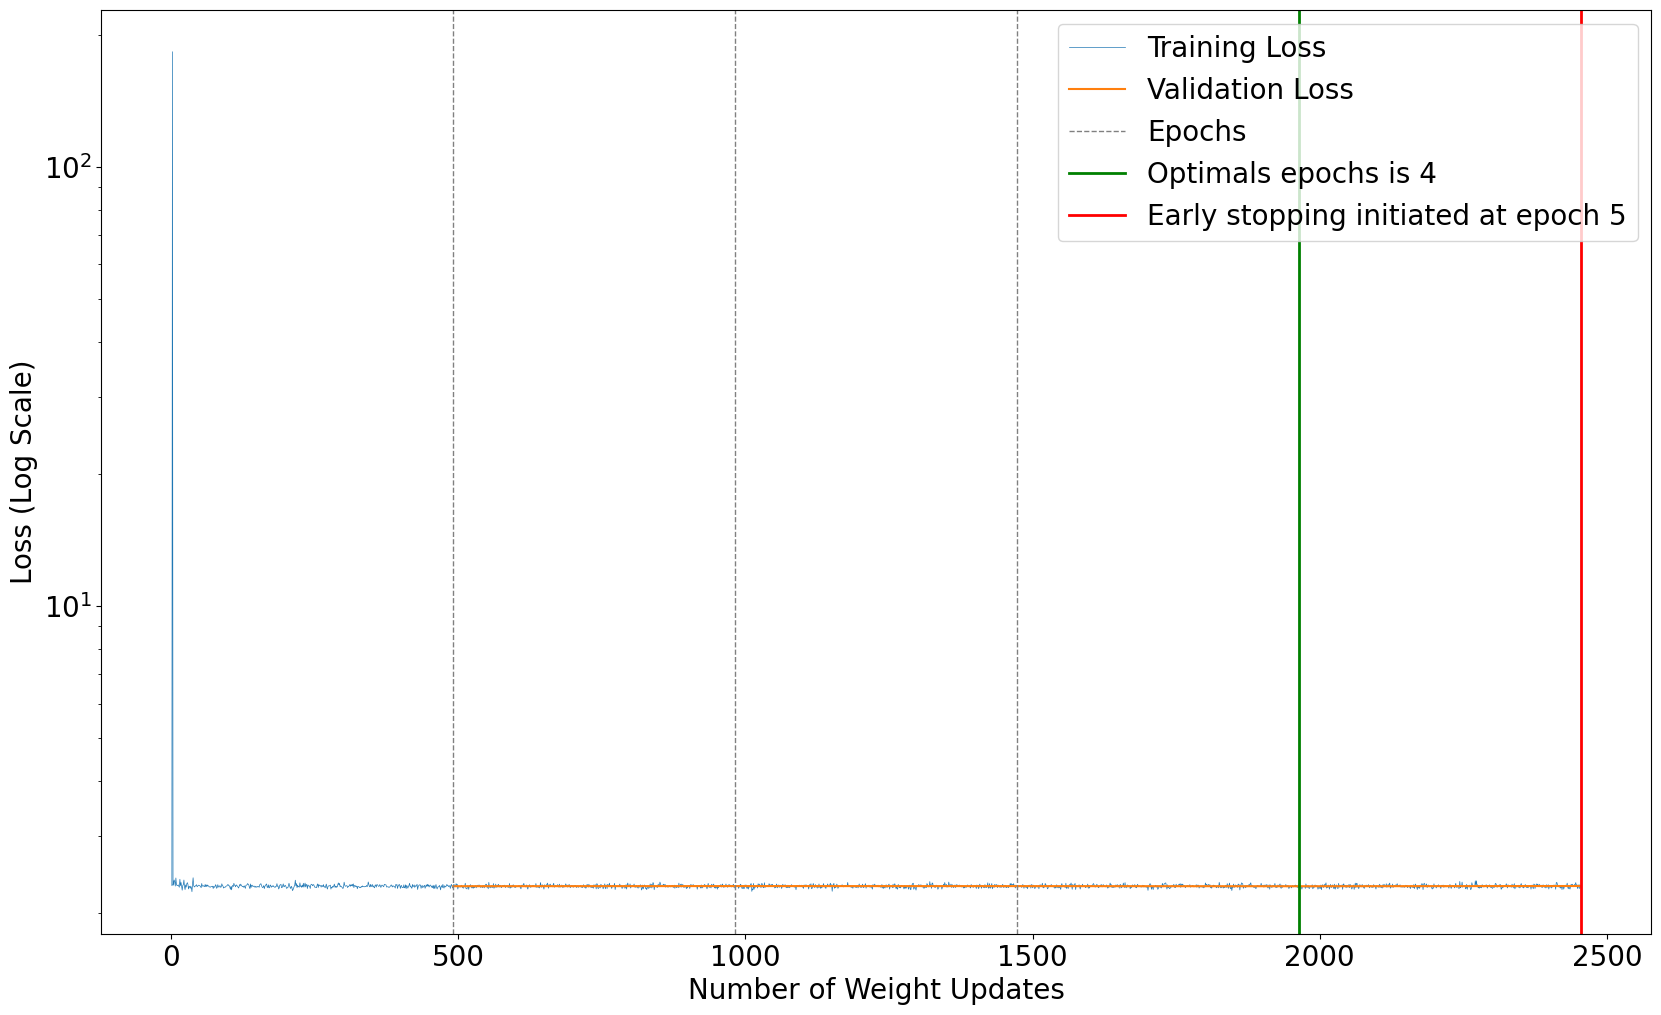

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.25E-02


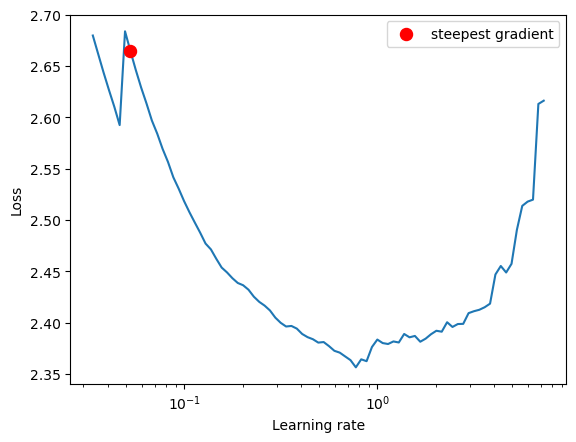

Selected learning rate from LR range test: 0.01768567572275735


Validation Accuracy: 11.03%
Validation Loss: 2.30


Validation Accuracy: 10.79%
Validation Loss: 2.30


Validation Accuracy: 9.69%
Validation Loss: 2.30
Early stopping triggered. Restoring best model weights.



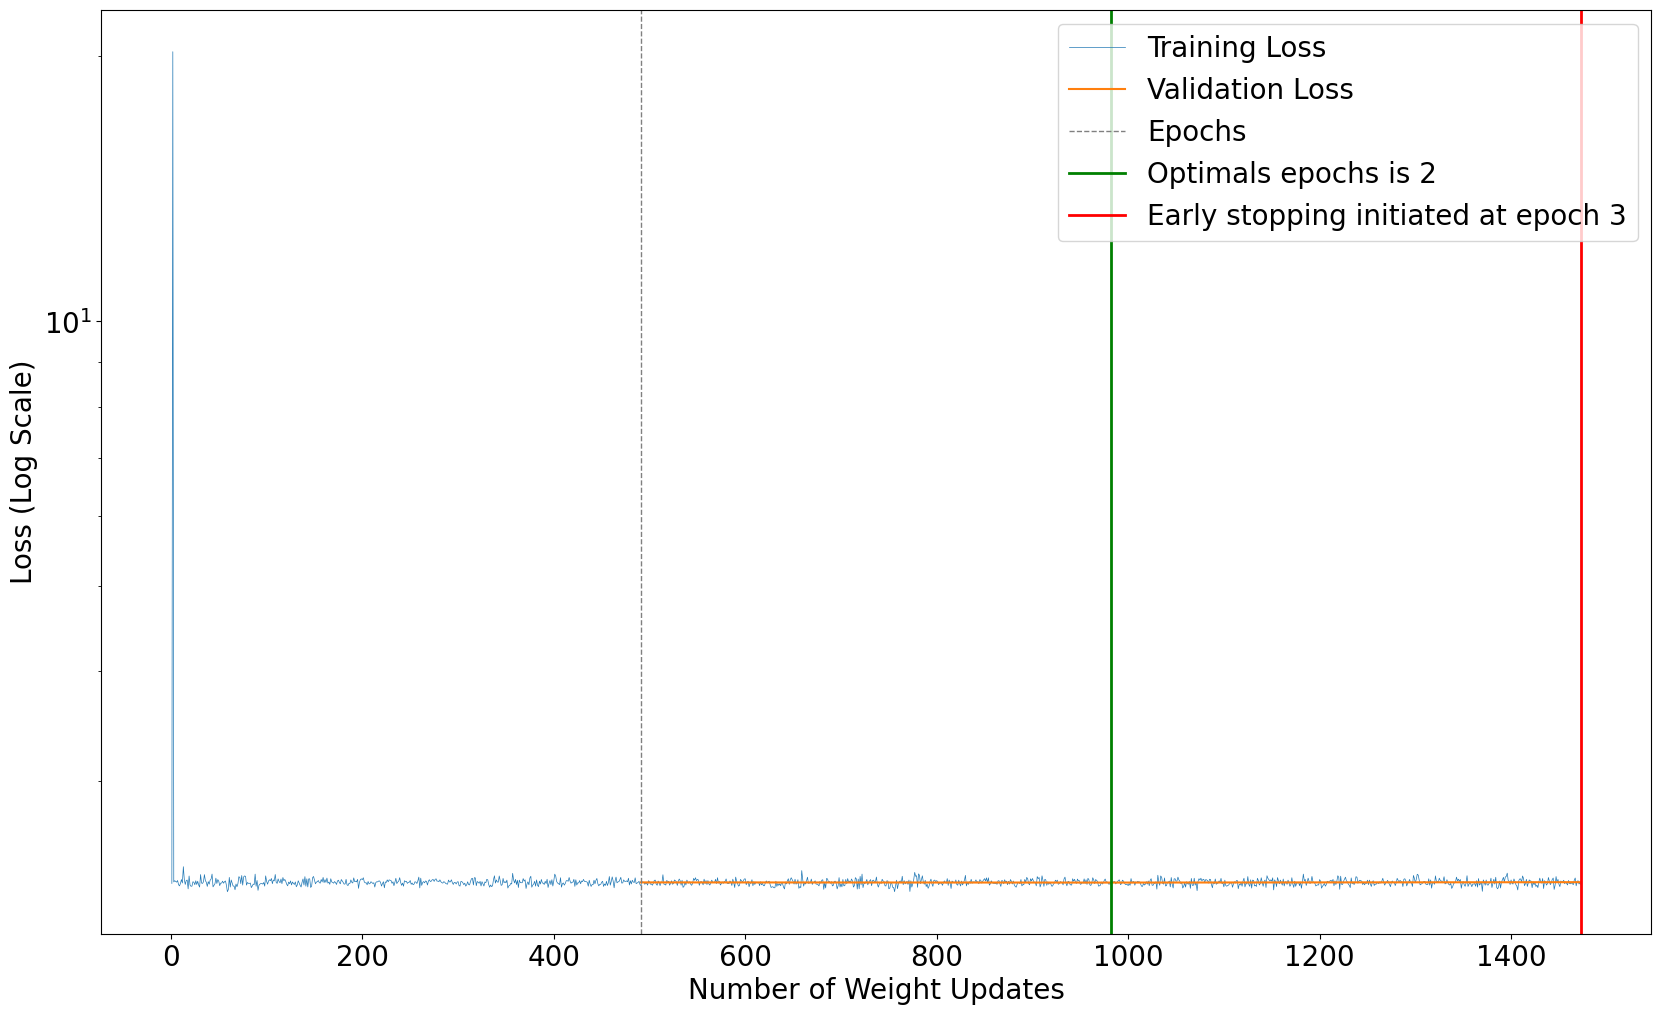

In [5]:
model_best_val_losses,model_best_epochs,model_objects,learning_rate=cnntrain(train_loader=train_loader,\
val_loader=val_loader,combined_loader=combined_loader,num_filters=num_filters,len_data=len(dataset.classes),num_epochs=50)

In [6]:
cnn_df=pd.DataFrame({'Configs': num_filters, 'Epochs': model_best_epochs, 'Val_Loss': model_best_val_losses, 'learning_rate': learning_rate})
cnn_df.to_csv("custom_cnn_results.csv",index=False)

In [5]:
results_df=pd.read_csv("custom_cnn_results.csv")
best_config=eval(results_df.loc[results_df['Val_Loss'].idxmin()]["Configs"])
best_epochs=results_df.loc[results_df['Val_Loss'].idxmin()]["Epochs"]
learning_rate=results_df.loc[results_df['Val_Loss'].idxmin()]["learning_rate"]
model_object=cnntrain(train_loader,val_loader,combined_loader,len(dataset.classes),\
        num_filters=[best_config], num_epochs=best_epochs, train_only=True, custom="Custom",learning_rate=learning_rate)
best_models = pd.concat([best_models, pd.DataFrame({'model_name': ['CustomCNN'], 'model': [model_object] , 'val_loss' : [min(results_df["Val_Loss"])]})], ignore_index=True)

C:\Users\naksh\AppData\Local\Temp\ipykernel_10260\634470554.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best_models = pd.concat([best_models, pd.DataFrame({'model_name': ['CustomCNN'], 'model': [model_object] , 'val_loss' : [min(results_df["Val_Loss"])]})], ignore_index=True)


# Transfer Learning

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.03E-03


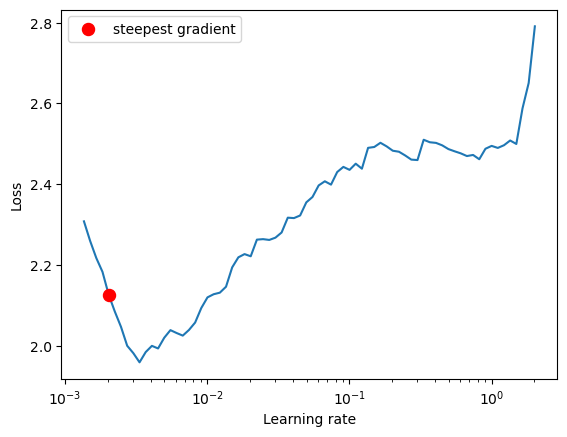

Selected learning rate from LR range test: 0.0033451854991893254


Validation Accuracy: 30.24%
Validation Loss: 1.94


Validation Accuracy: 80.64%
Validation Loss: 0.66


Validation Accuracy: 92.60%
Validation Loss: 0.26


Validation Accuracy: 92.30%
Validation Loss: 0.25


Validation Accuracy: 95.51%
Validation Loss: 0.15


Validation Accuracy: 95.51%
Validation Loss: 0.14


Validation Accuracy: 94.23%
Validation Loss: 0.20
Early stopping triggered. Restoring best model weights.



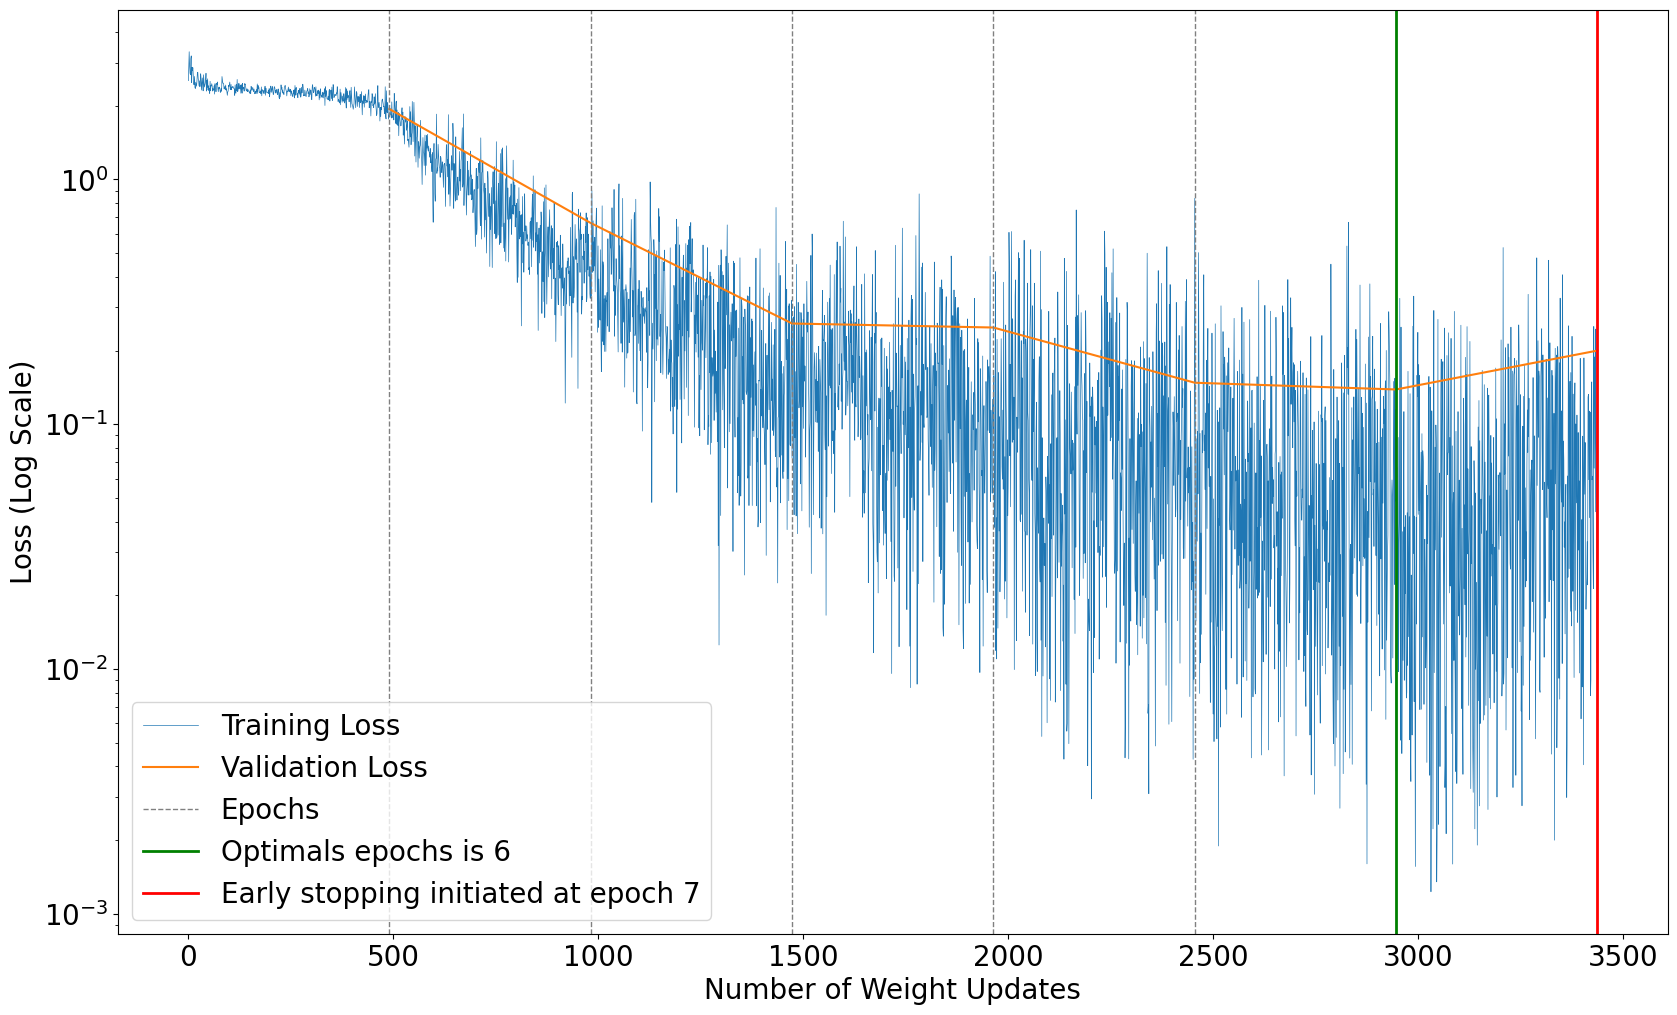

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.74E-03


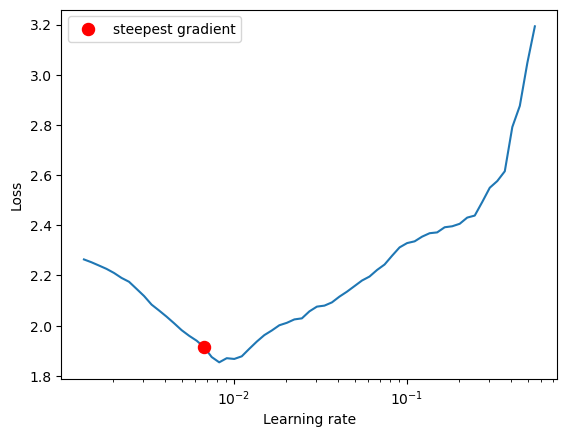

Selected learning rate from LR range test: 0.008230437709755064


Validation Accuracy: 64.56%
Validation Loss: 1.17


Validation Accuracy: 73.33%
Validation Loss: 1.13


Validation Accuracy: 93.07%
Validation Loss: 0.21


Validation Accuracy: 91.35%
Validation Loss: 0.28
Early stopping triggered. Restoring best model weights.



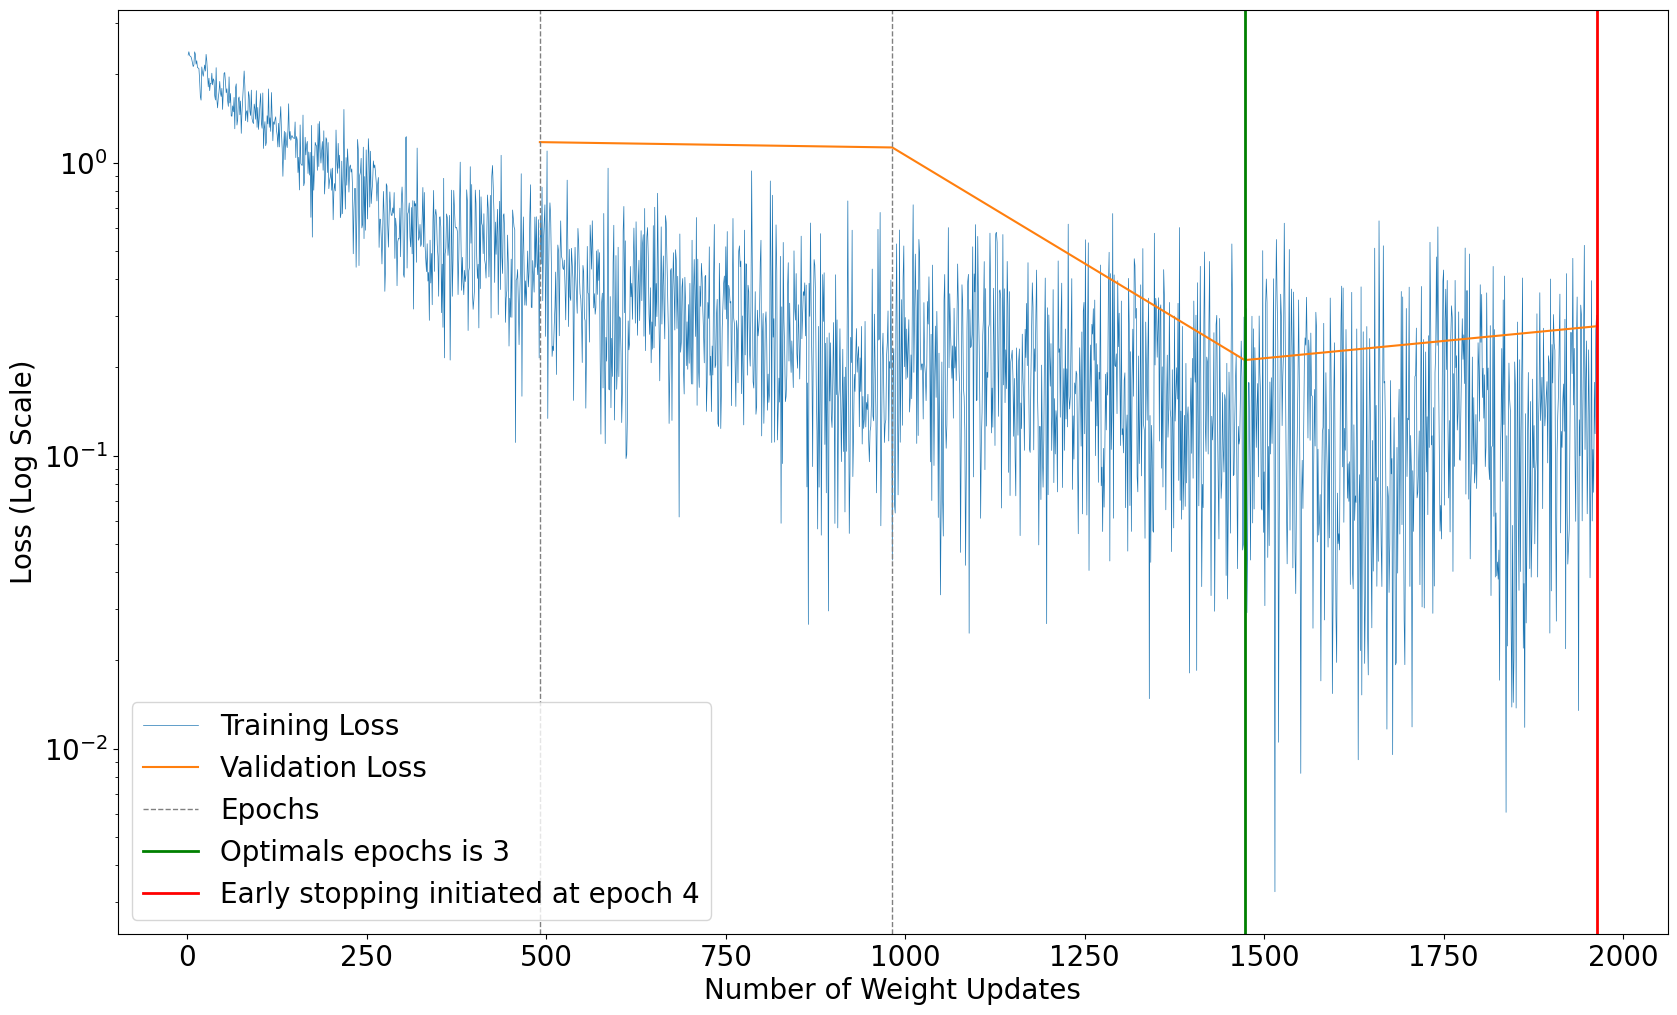

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.74E-03


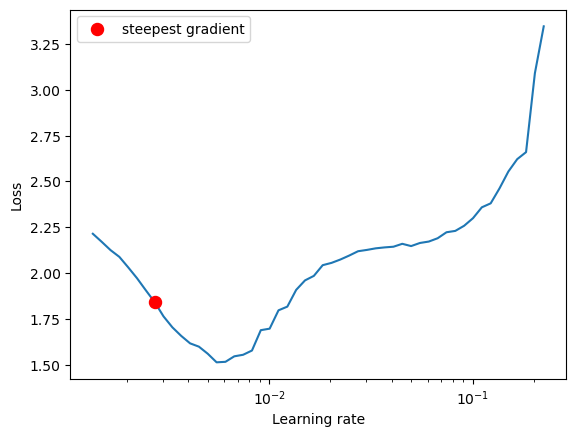

Selected learning rate from LR range test: 0.005516250028242762


Validation Accuracy: 88.05%
Validation Loss: 0.40


Validation Accuracy: 95.84%
Validation Loss: 0.15


Validation Accuracy: 95.21%
Validation Loss: 0.16
Early stopping triggered. Restoring best model weights.



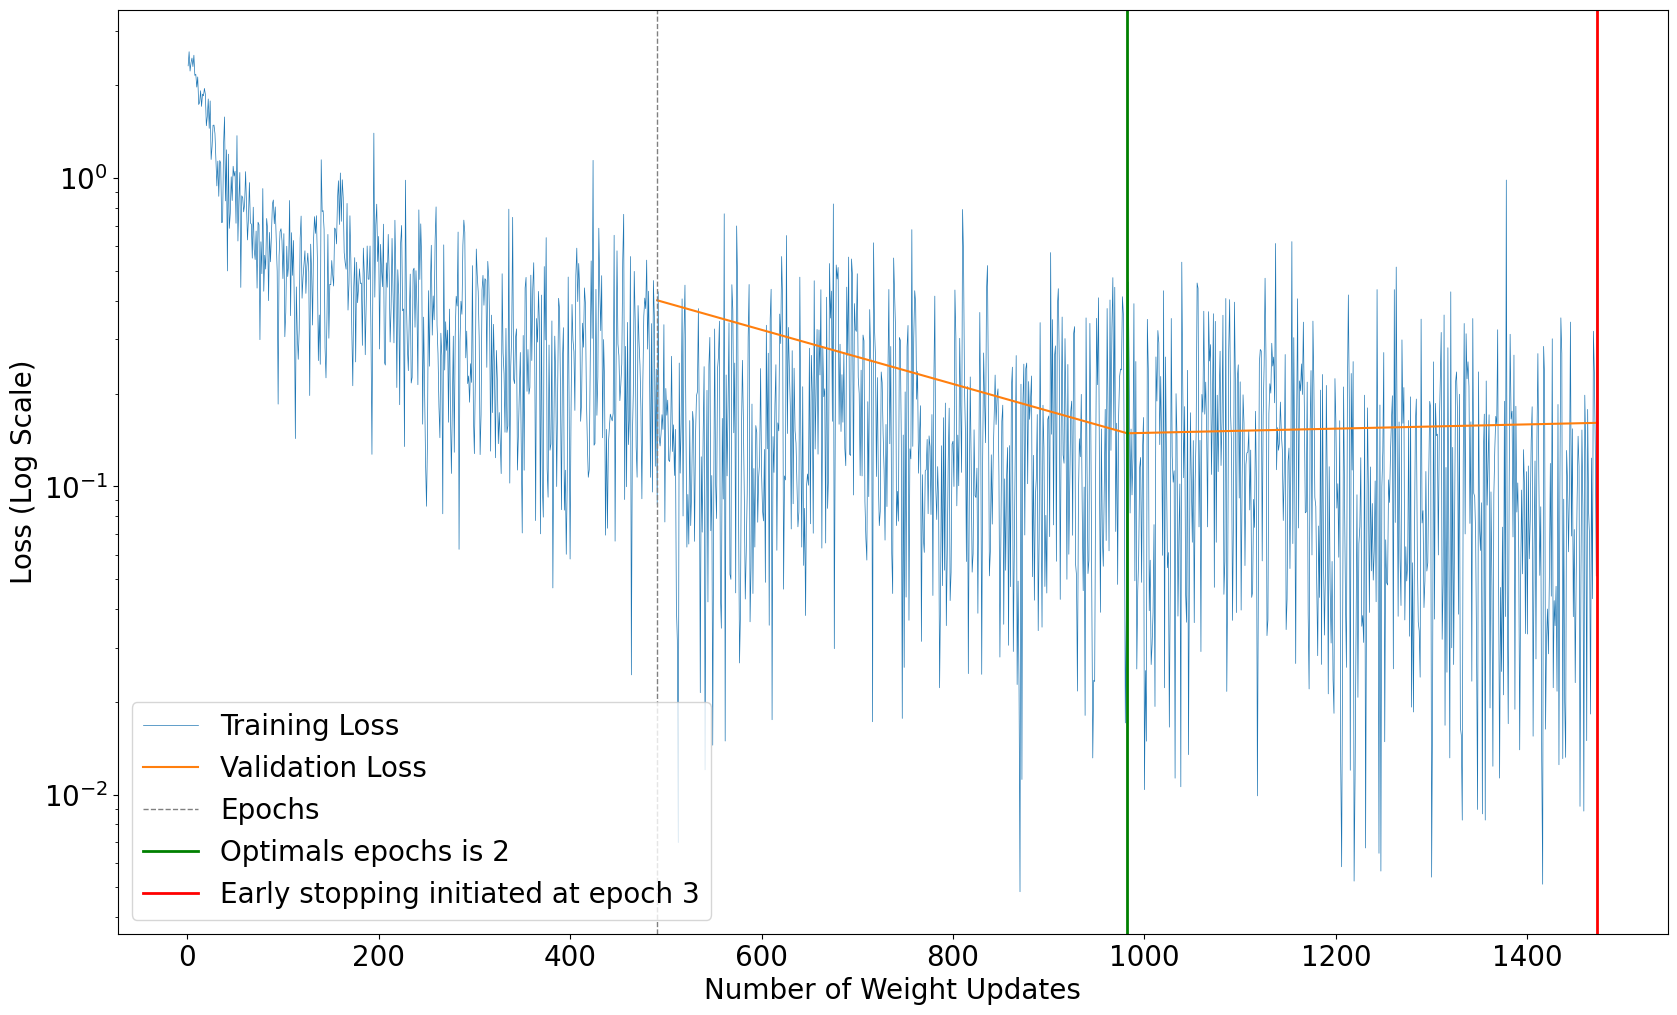

In [6]:
for custom in ["Resnet","VIT","EfficientNet"]:
    model_best_val_losses,model_best_epochs,model_objects,learning_rate=cnntrain(train_loader,val_loader,combined_loader,\
    len(dataset.classes),num_filters="Pretrained-Model",num_epochs=50,train_only=False,custom=custom)
    results_df=pd.DataFrame({'Epochs': model_best_epochs, 'Val_Loss': model_best_val_losses, 'learning_rate' : learning_rate})
    results_df.to_csv(f"{custom}_results.csv",index=False)

In [7]:
for custom in ["Resnet","VIT","EfficientNet"]:
    results_df=pd.read_csv(f"{custom}_results.csv")
    best_epochs=int(results_df.loc[results_df['Val_Loss'].idxmin()]["Epochs"])
    learning_rate=results_df.loc[results_df['Val_Loss'].idxmin()]["learning_rate"]
    model_object=cnntrain(train_loader,val_loader,combined_loader,len(dataset.classes),\
            num_filters="Pretrained-Model", num_epochs=best_epochs, train_only=True, custom=custom, learning_rate=learning_rate)
    best_models = pd.concat([best_models, pd.DataFrame({'model_name': [custom], 'model': [model_object], 'val_loss' : [min(results_df["Val_Loss"])]})], ignore_index=True)

In [8]:
best_models["pickle_path"]=np.nan
if not os.path.exists('model_pickles'):
    os.makedirs('model_pickles')
for index, row in best_models.iterrows():
    model_file = f'model_pickles/model_{best_models.iloc[index,0]}.pkl'
    with open(model_file, 'wb') as file:
        pickle.dump(best_models.iloc[index,1], file)
    best_models.iloc[index,3]=model_file

best_models.to_csv("best_models.csv",index=False)

C:\Users\naksh\AppData\Local\Temp\ipykernel_10260\2070414688.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'model_pickles/model_CustomCNN.pkl' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  best_models.iloc[index,3]=model_file


In [9]:
best_models=pd.read_csv("best_models.csv")

for index, row in best_models.iterrows():
    # Load the pickled model
    model_file_path = row['pickle_path']
    with open(model_file_path, 'rb') as file:
        best_models.at[index, 'model'] = pickle.load(file)

# Image after each layer of convolution

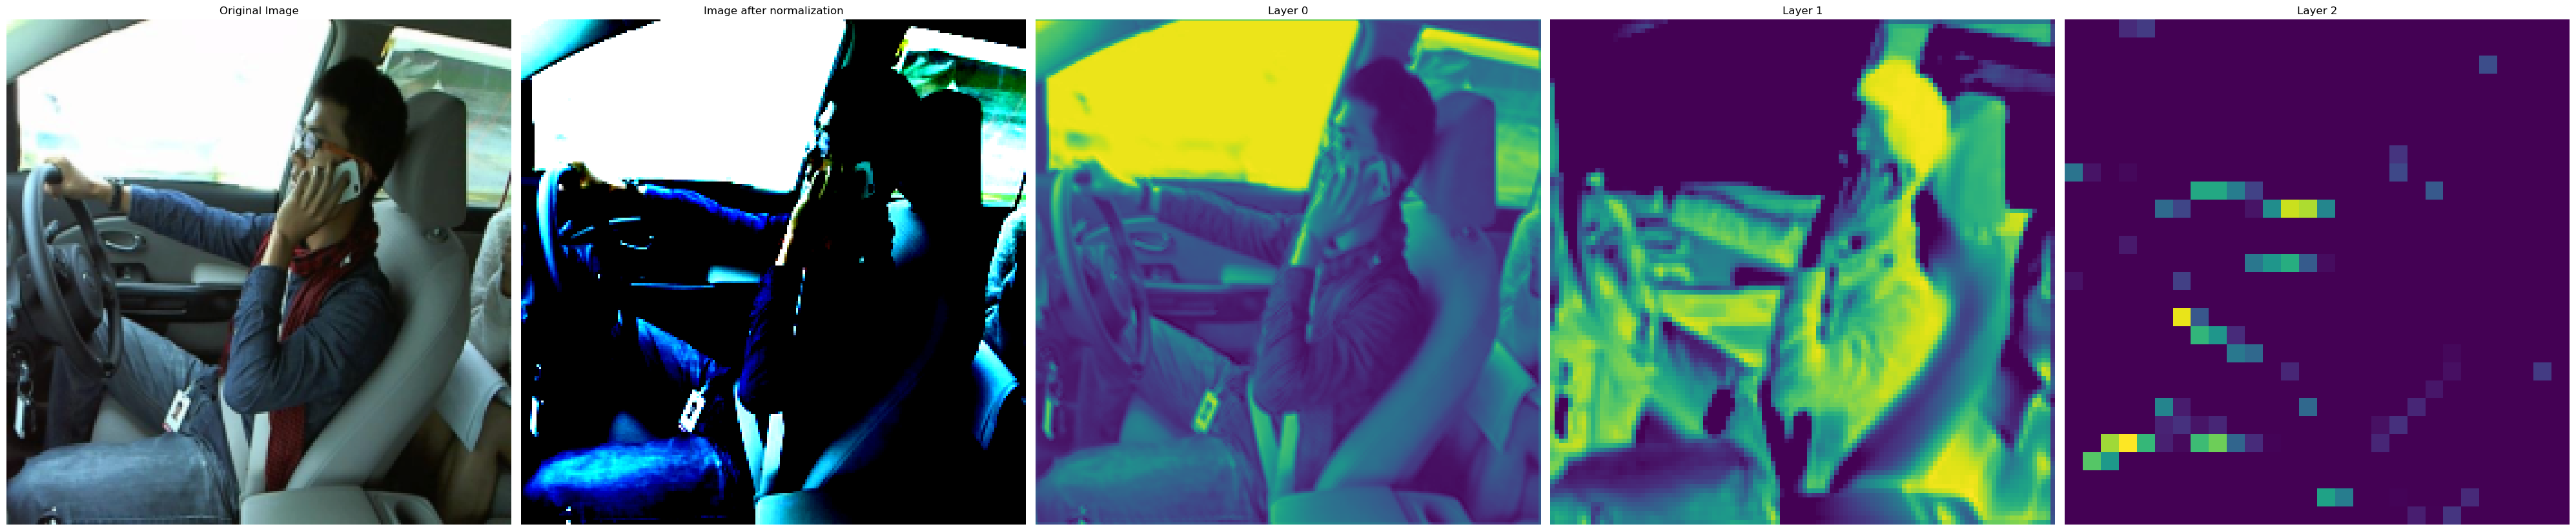

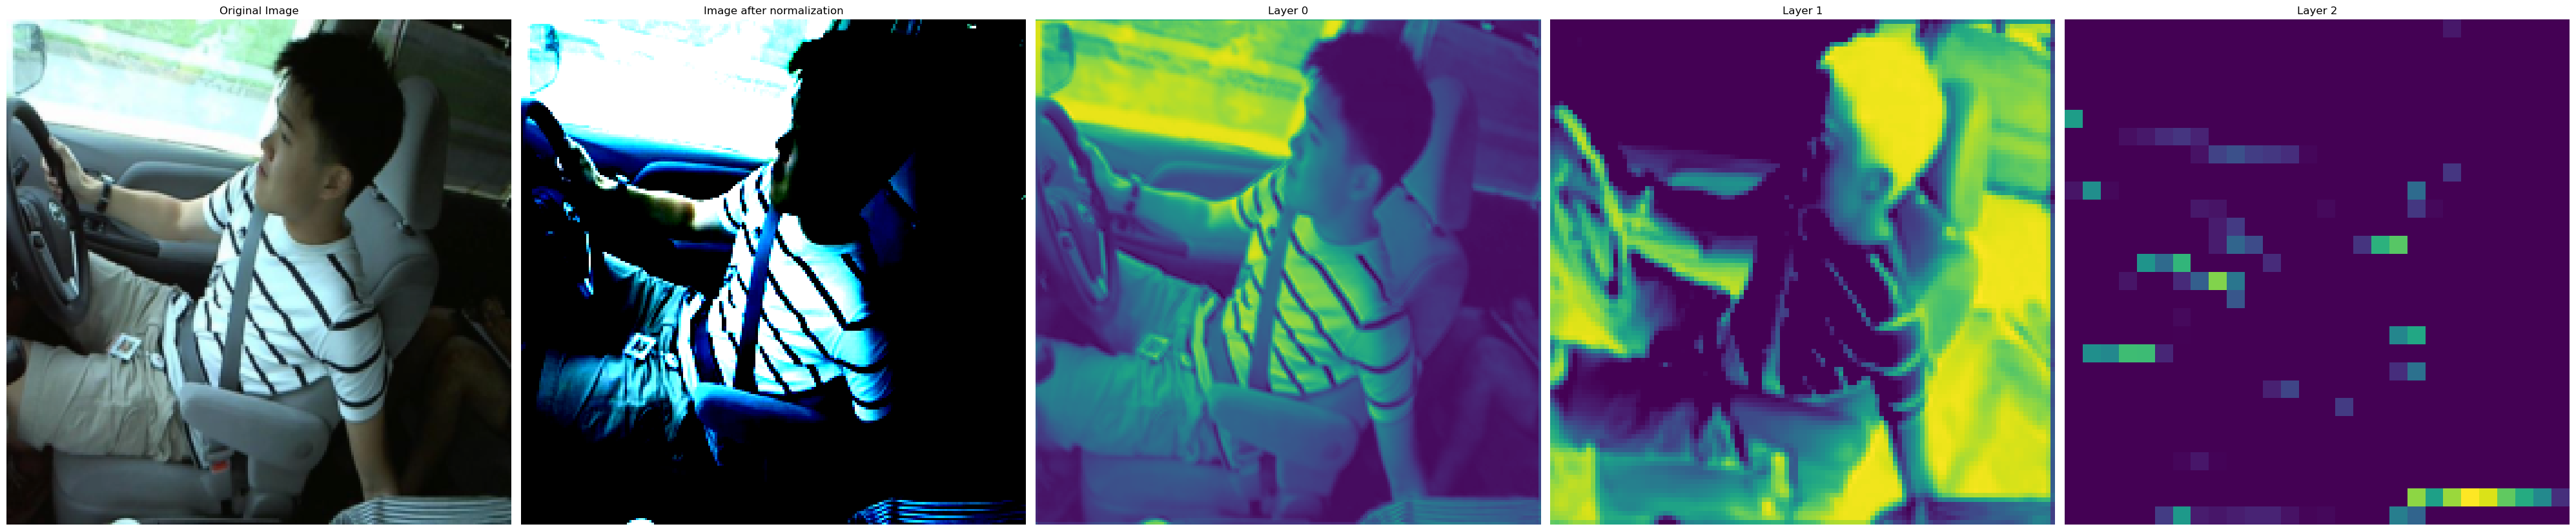

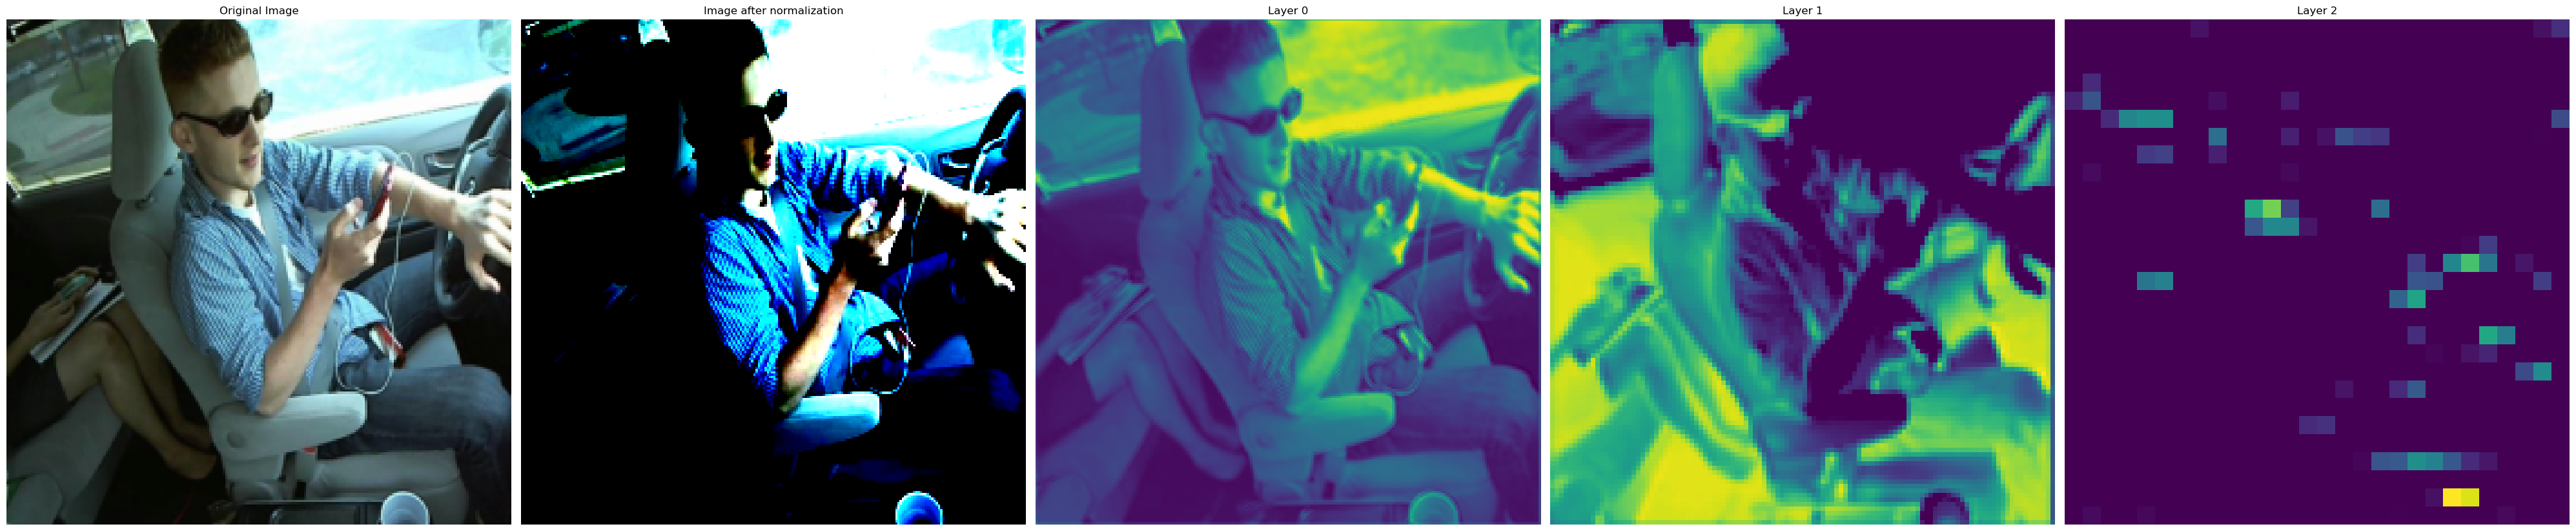

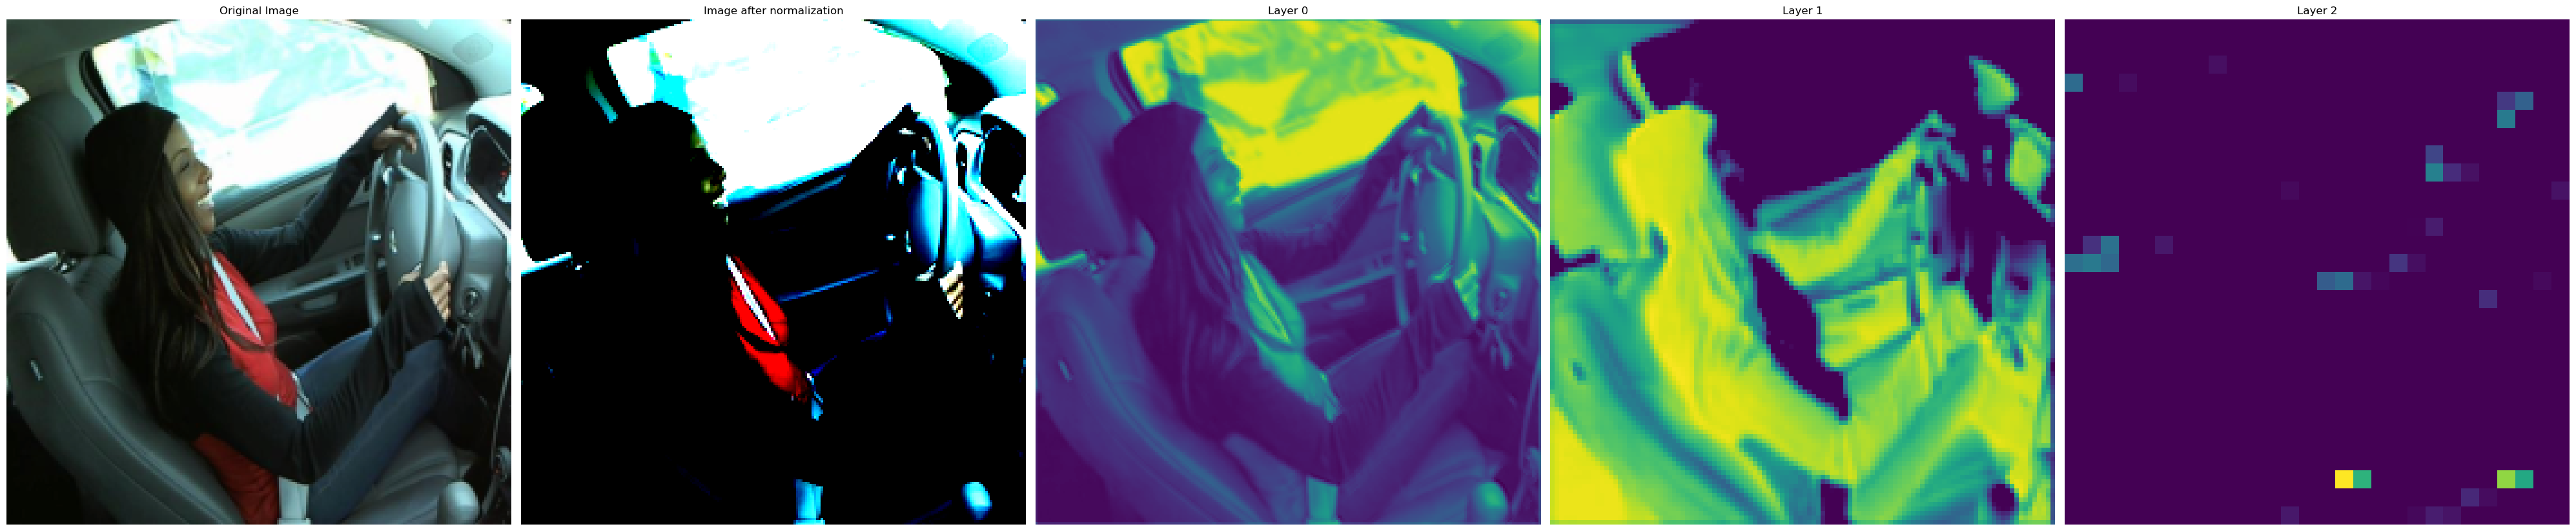

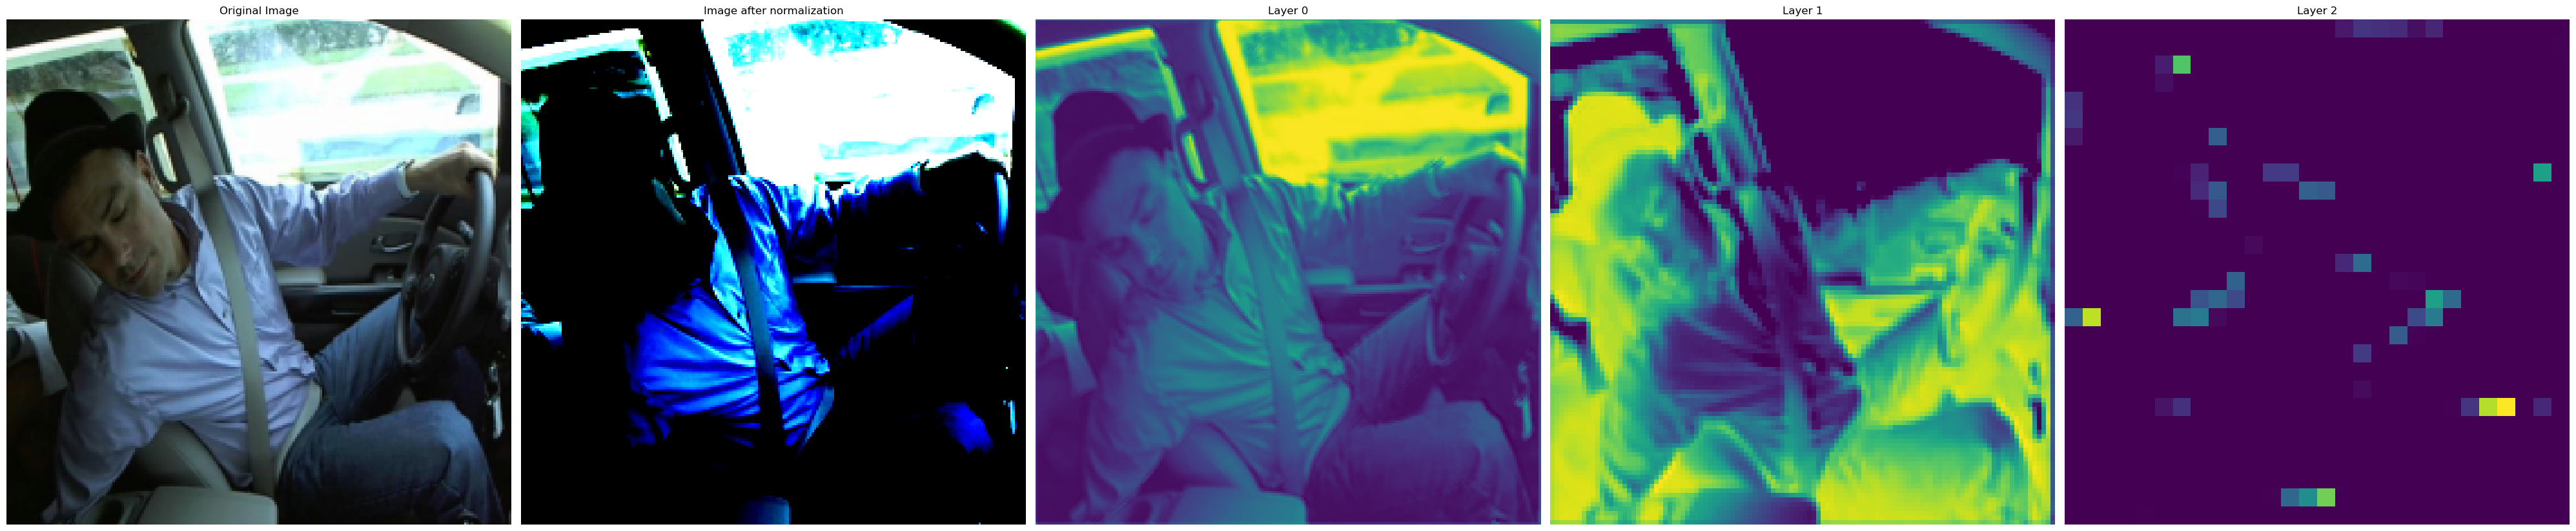

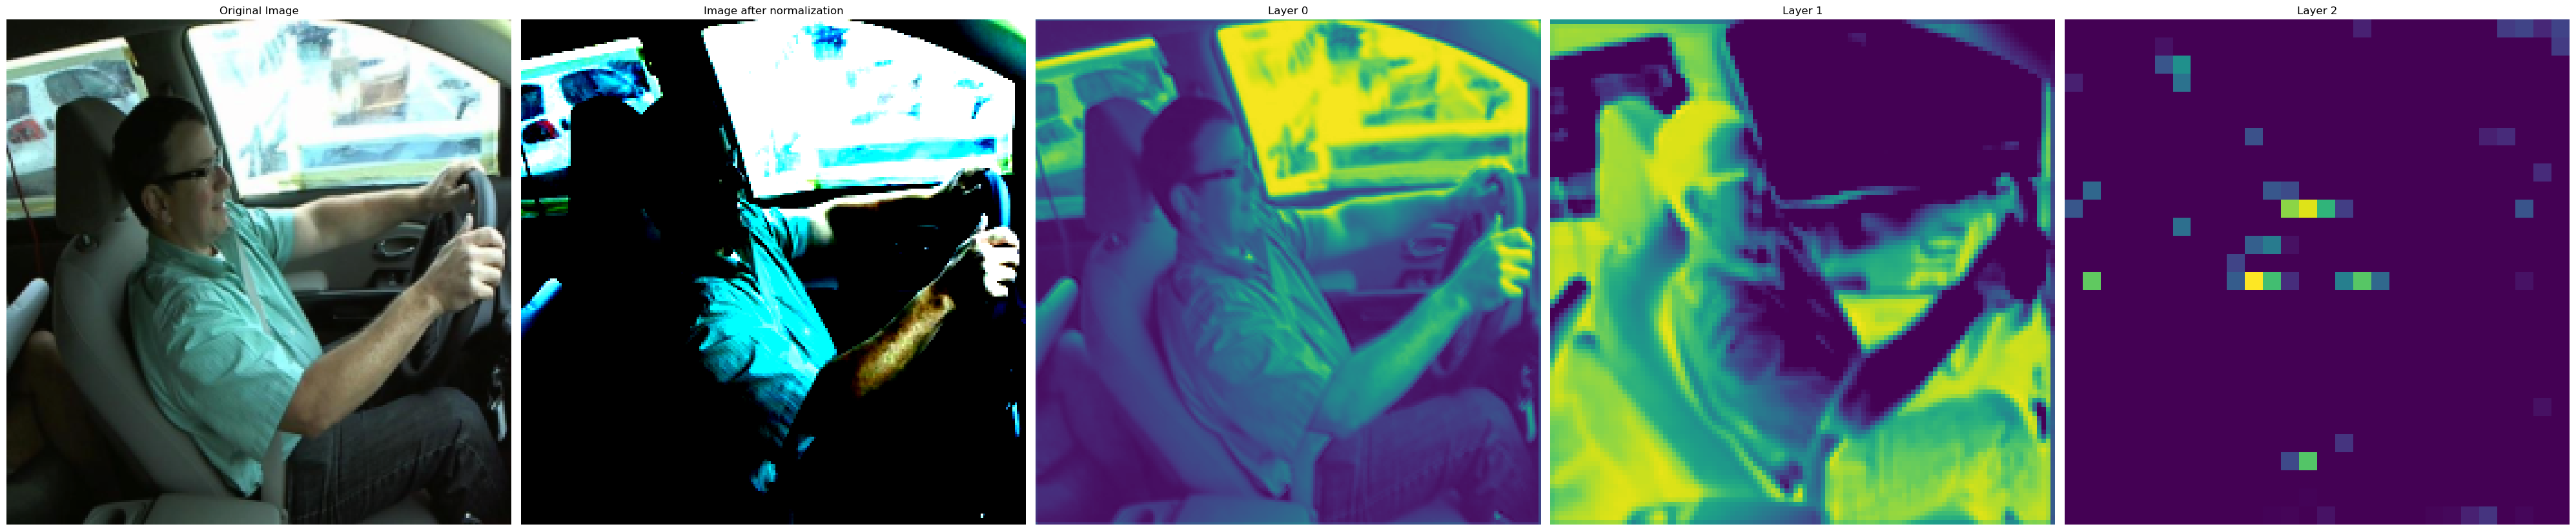

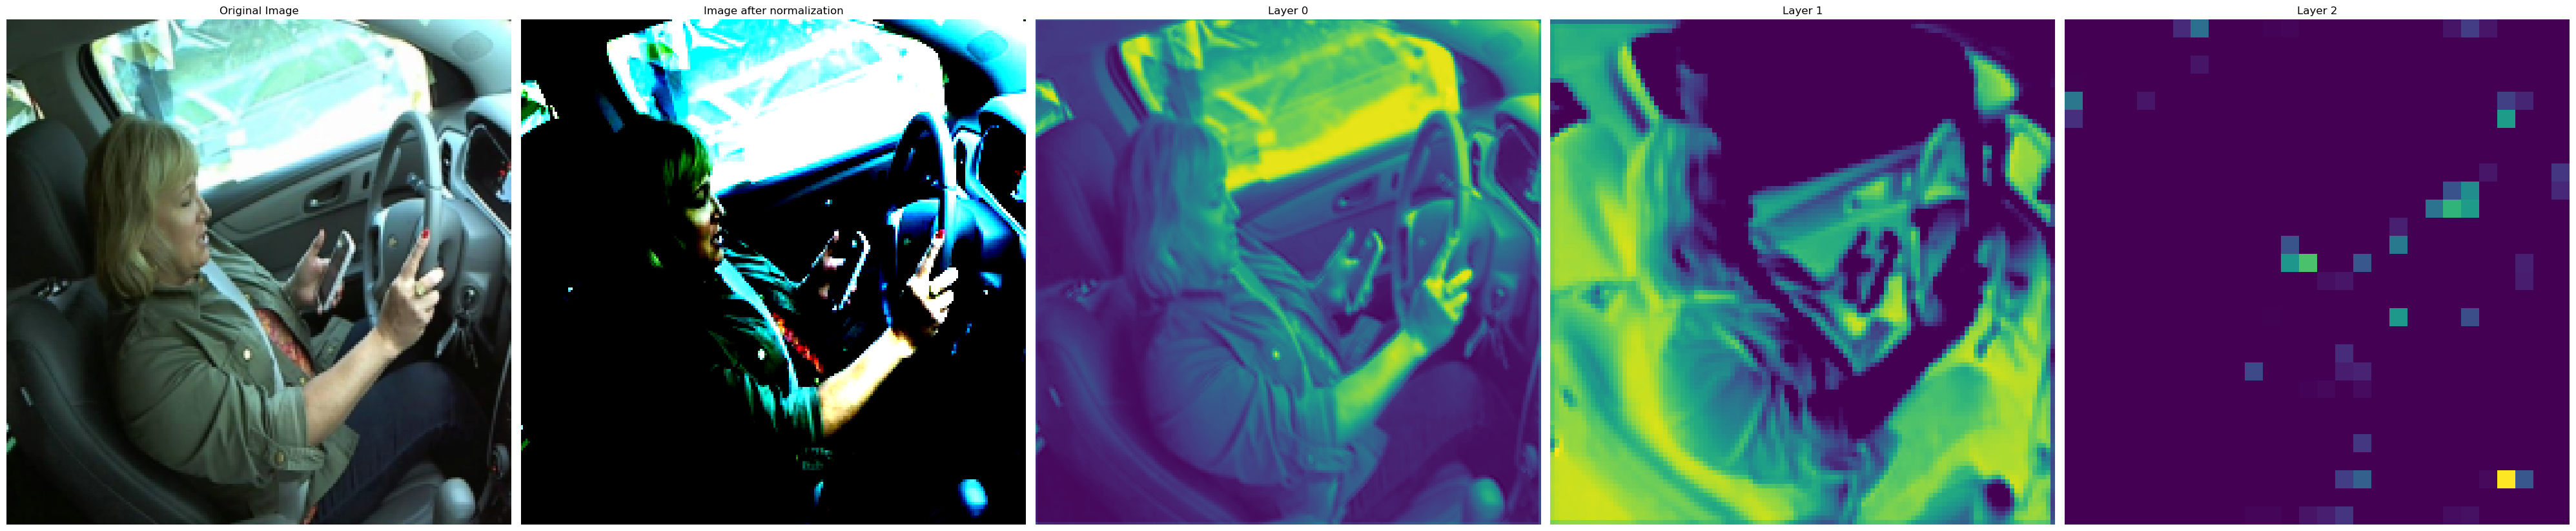

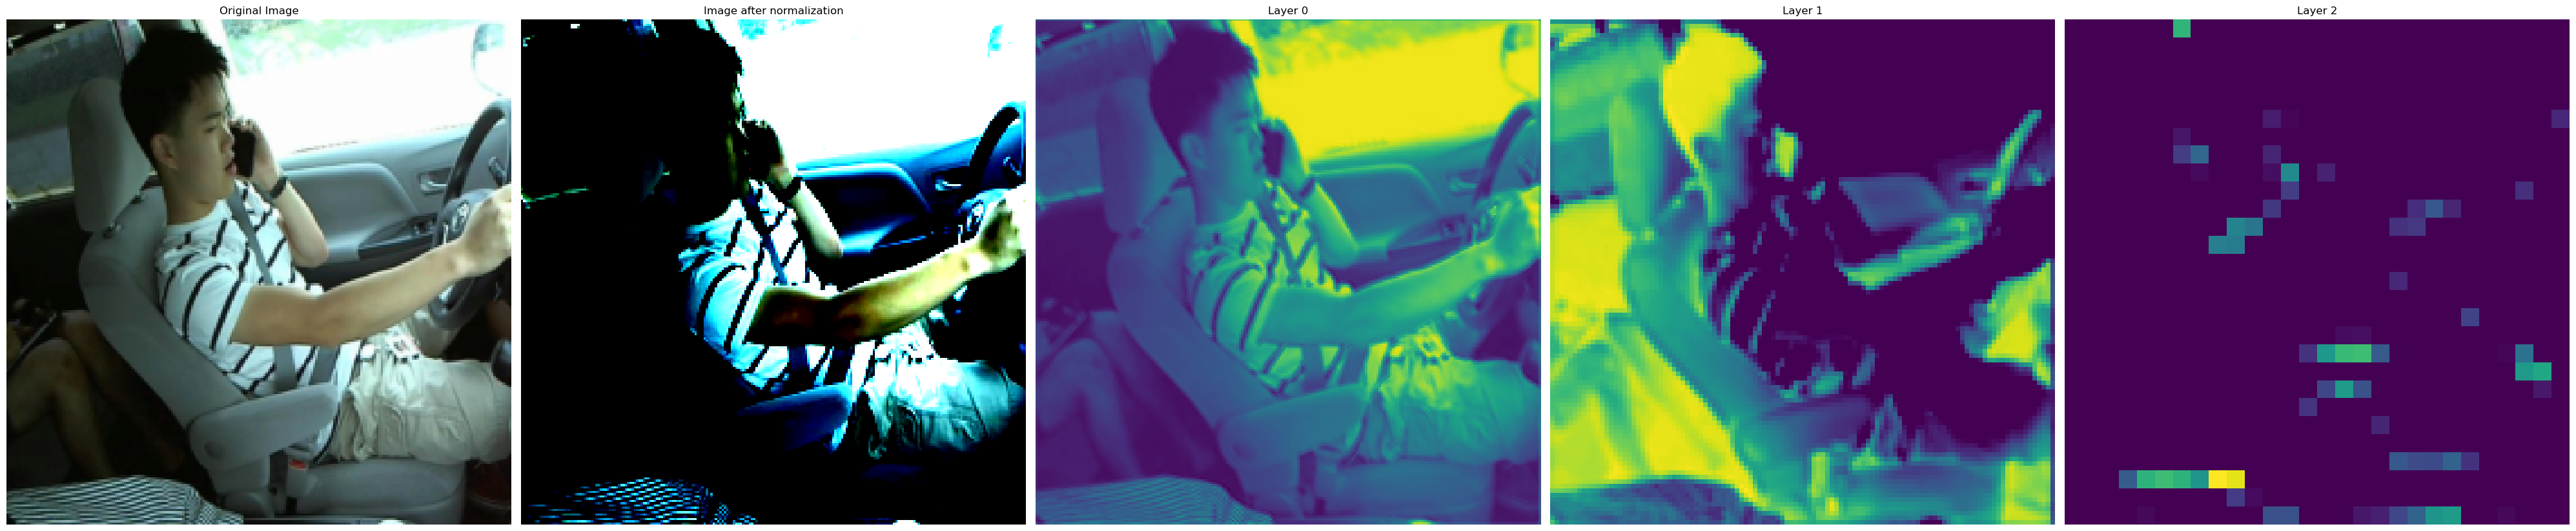

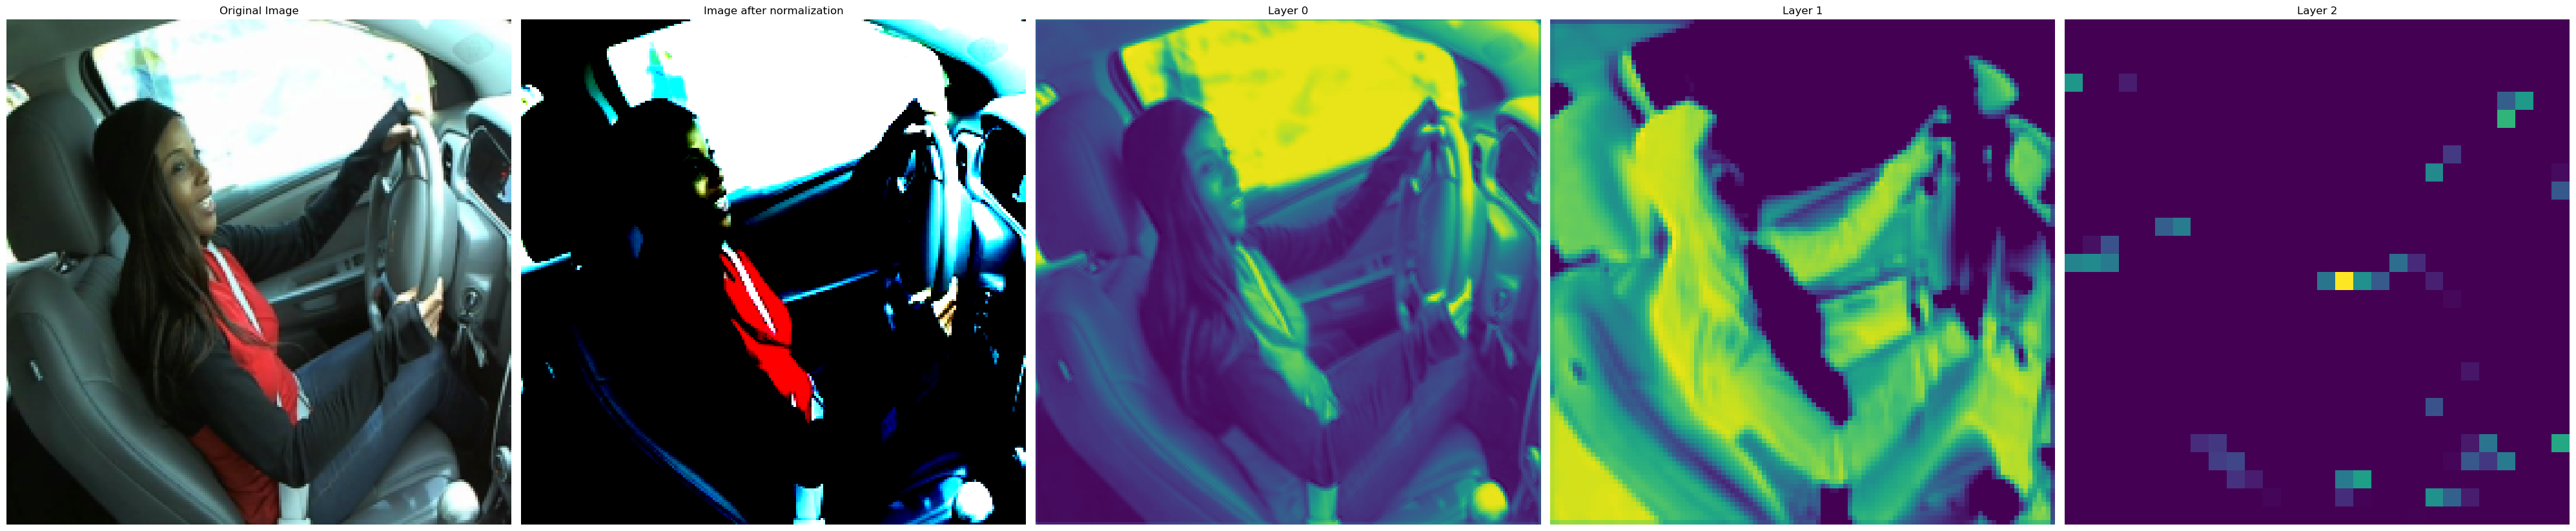

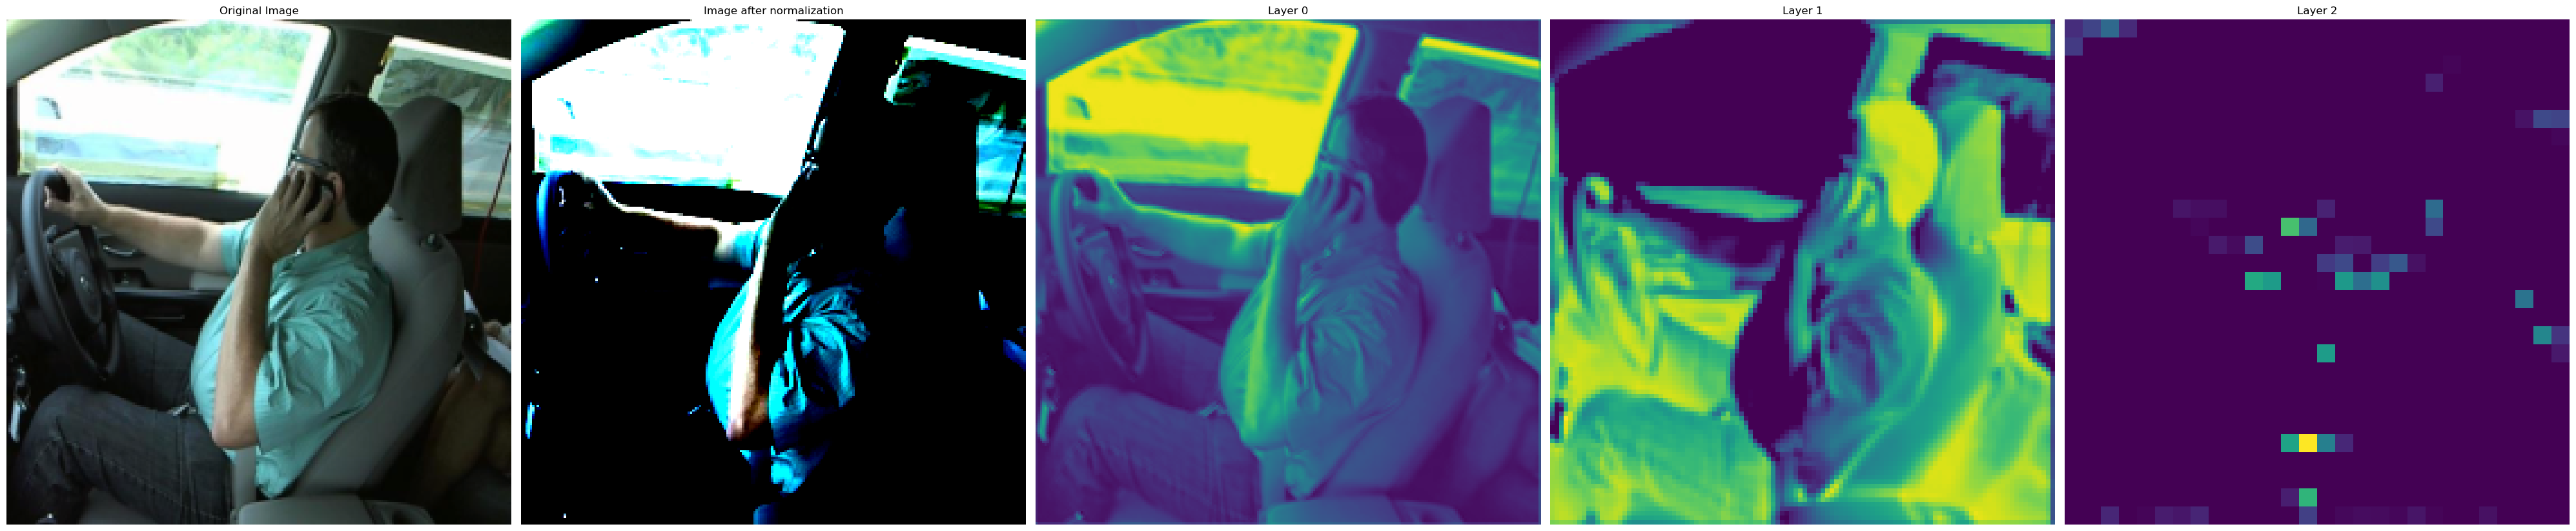

In [10]:
cnn_df=pd.read_csv("custom_cnn_results.csv")
for i in range(10):
    visualize_feature_maps(means, stds, best_models, test_loader, num_interest_layers=len(eval(cnn_df.iloc[cnn_df['Val_Loss'].idxmin()]["Configs"])))

# Model Evaluation Metrics

## Test Accuracies for Each Class

For each model, the test accuracies have been calculated for each class to provide a detailed assessment of their performance across different categories.

## Confusion Matrix (CM)

The confusion matrix breaks down the model's predictions for each class.

## Receiver Operating Characteristic Area Under the Curve (ROC AUC)

The ROC AUC score is a measure of the model's ability to distinguish between classes. This evaluation considers the safe driving class as the positive class while accounting for multiple classes.

## Precision-Recall Curve (PR Curve)

The Precision-Recall curve is plotted for each class, focusing on safe driving as the positive class. It illustrates the trade-off between precision and recall for different threshold values.

Model CustomCNN - Test Accuracy: 0.9917


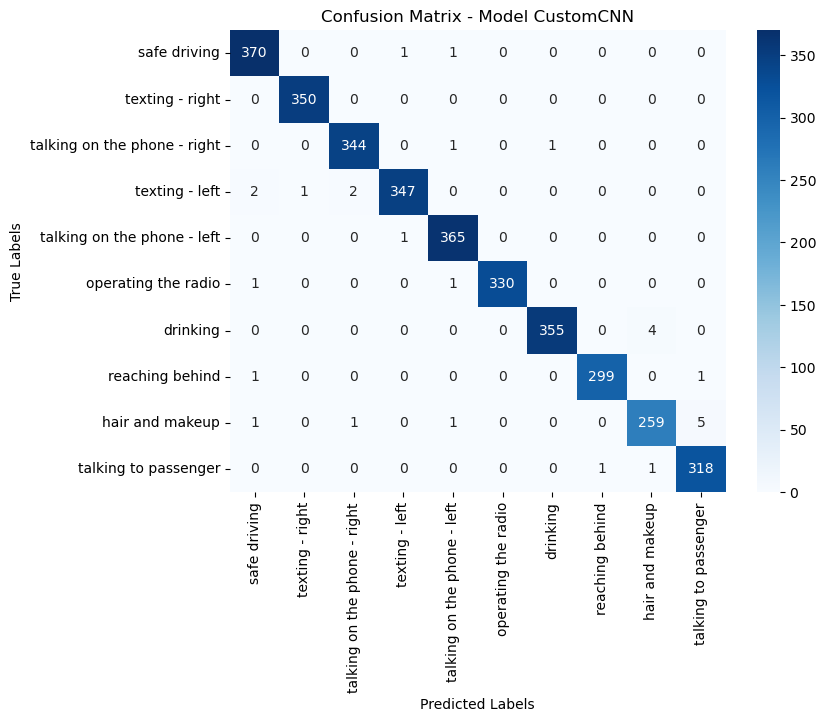

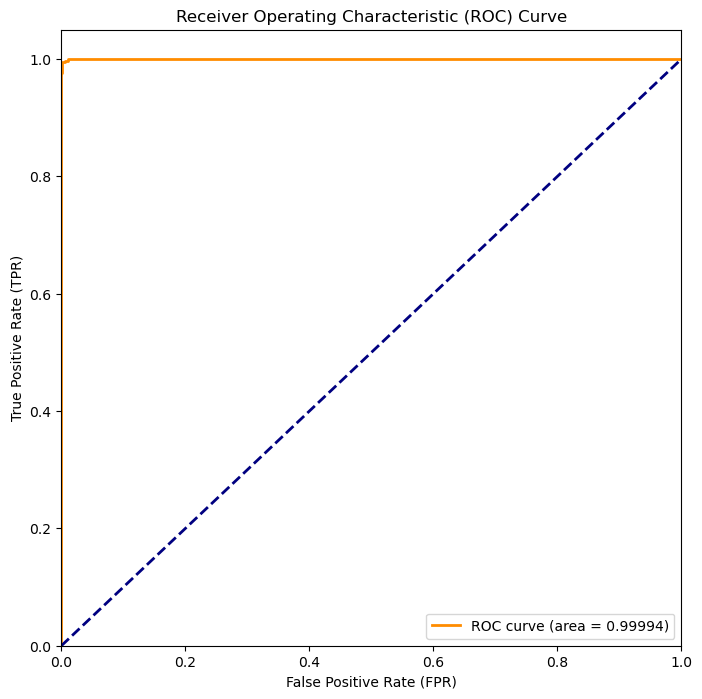

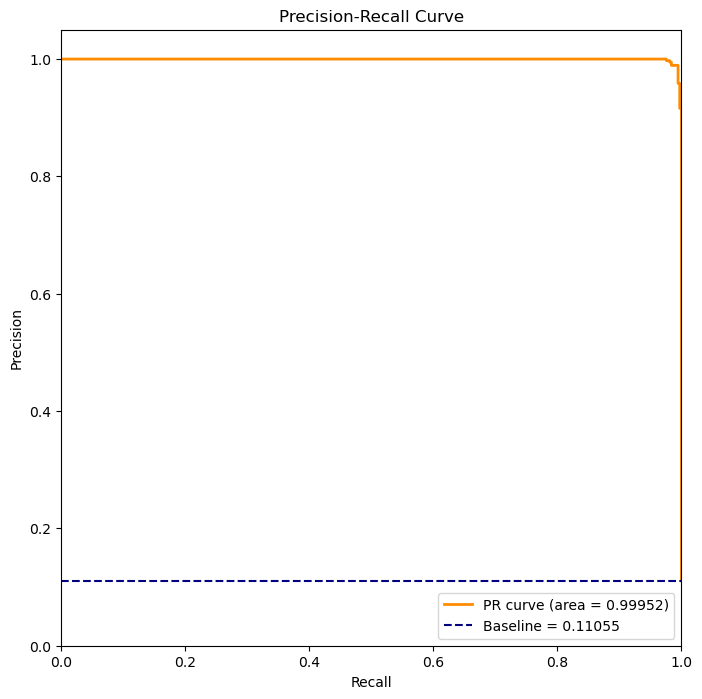

Model Resnet - Test Accuracy: 0.8514


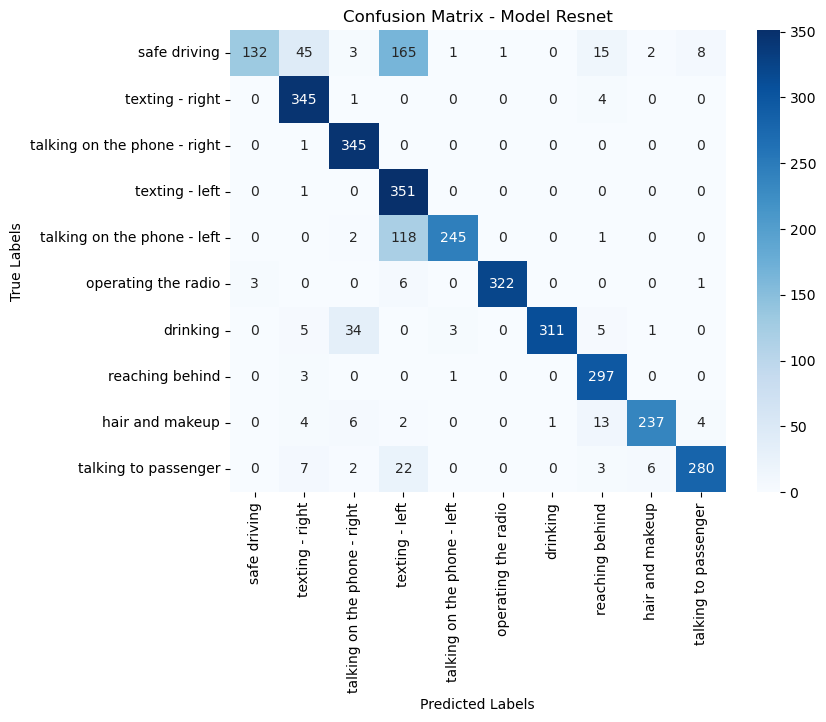

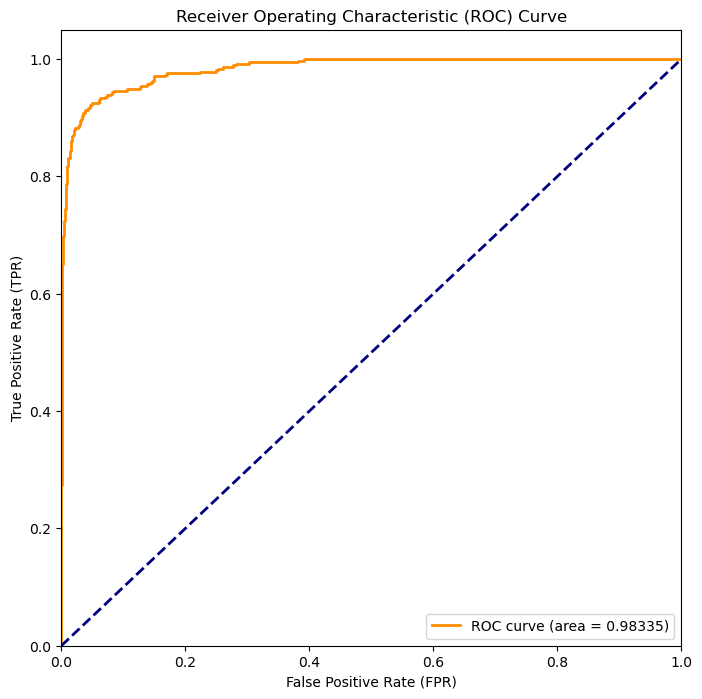

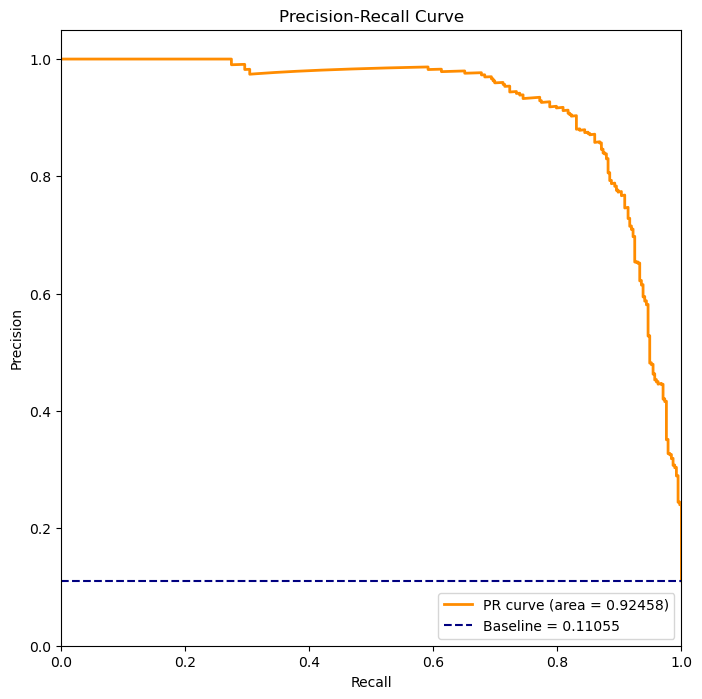

Model VIT - Test Accuracy: 0.8942


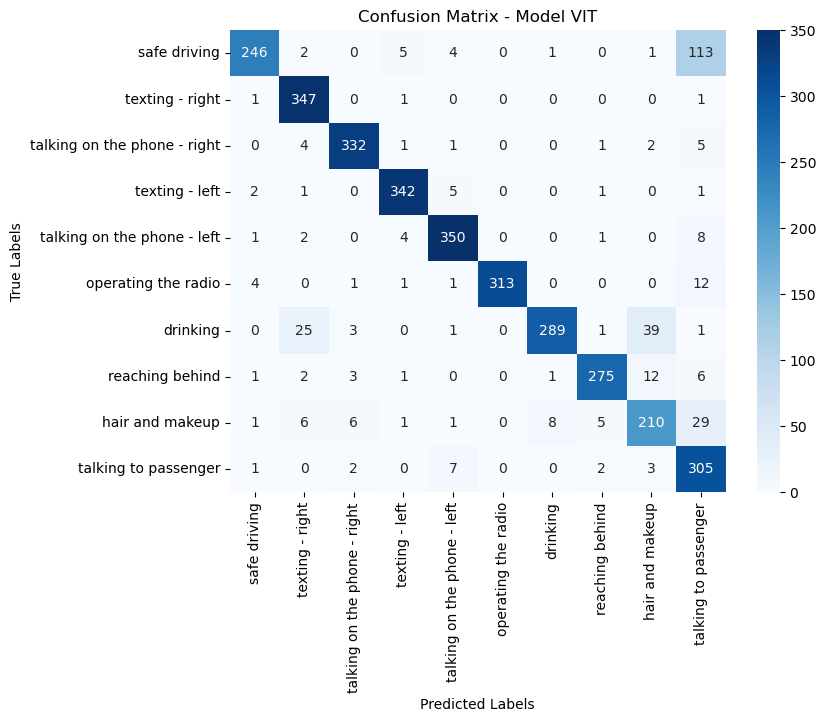

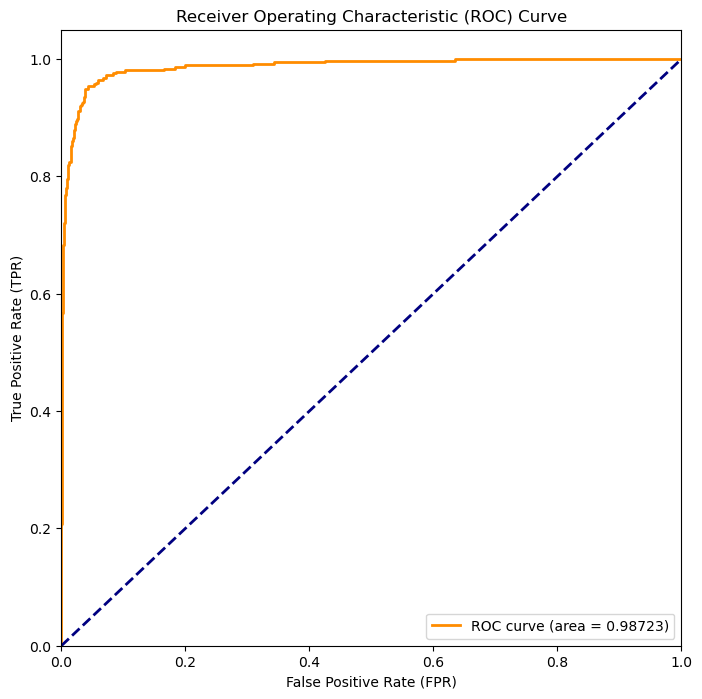

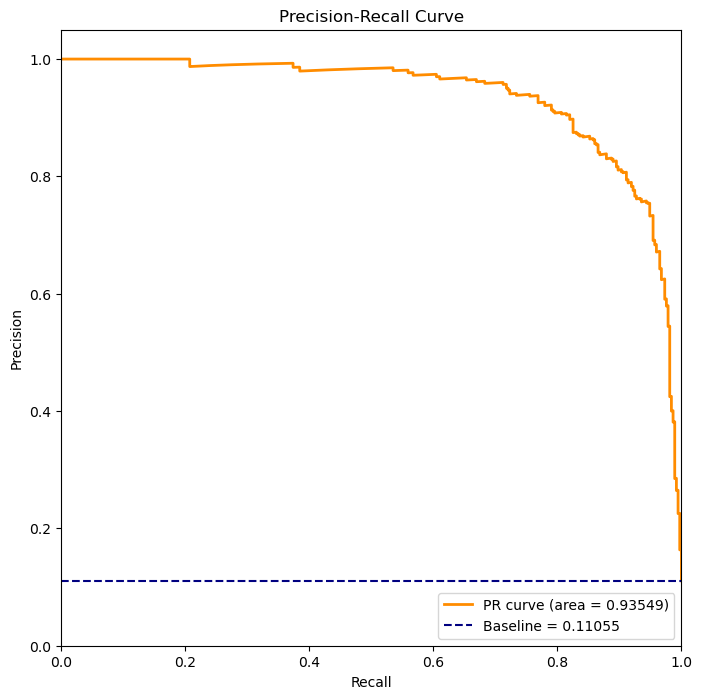

Model EfficientNet - Test Accuracy: 0.9358


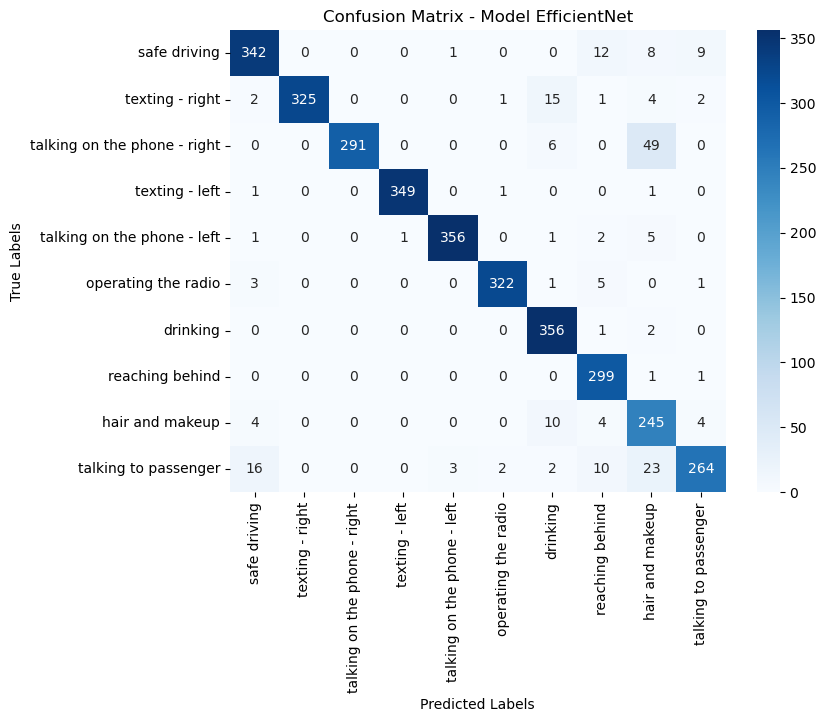

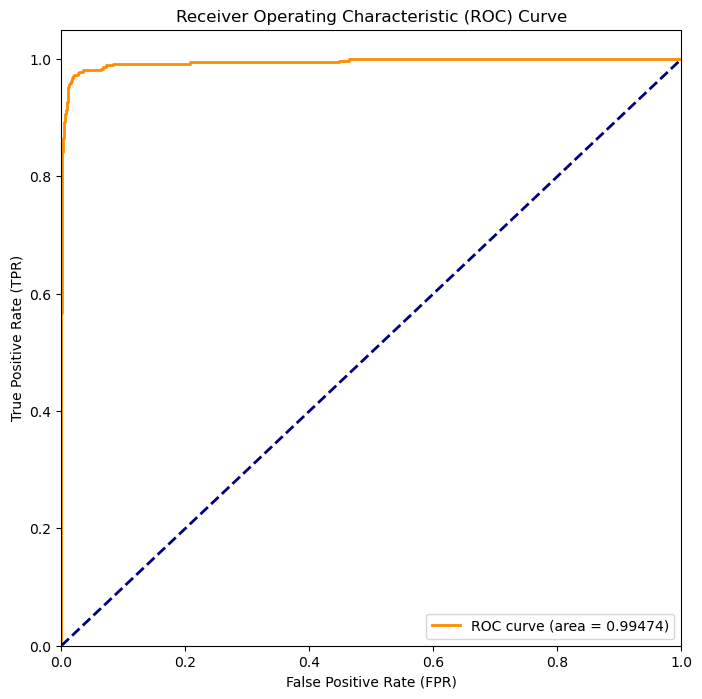

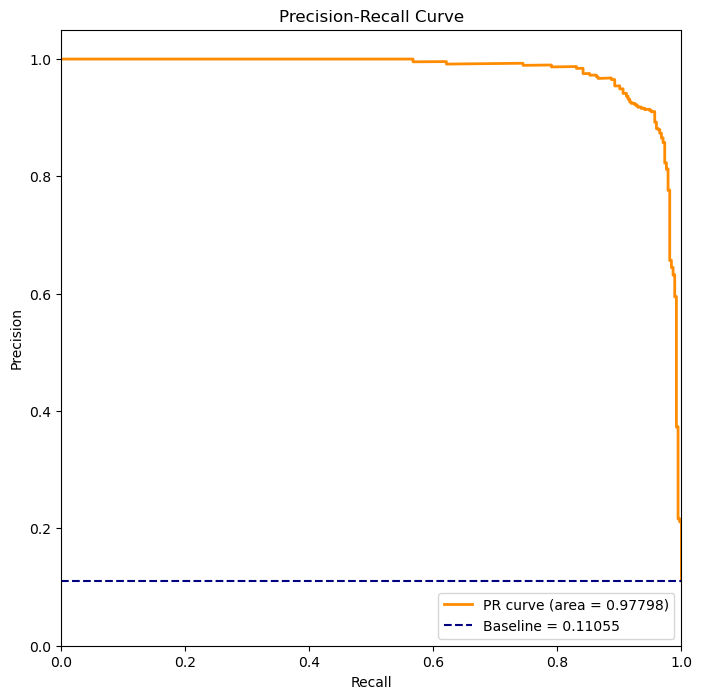

In [11]:
plot_confusion_matrices(best_models, test_loader)